# Figure 4 - what drives concentration fluctuations?
It is believed that density fluctuations are driven by the correlation between density field and velocity field. This correlation has been investigated by Saintillan and Shelly (

* concentration field $c$
* velocity field $v$
* velocity divergence $\nabla \cdot v$
* source field $\nabla \cdot (c\boldsymbol{n})$
* another source field $\nabla \cdot (c\boldsymbol{v})$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import myImageLib as mil
from skimage import io, measure
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
import corrLib as cl
from scipy.signal import savgol_filter
import matplotlib as mpl
from numpy.polynomial.polynomial import polyvander
from scipy.optimize import curve_fit
from miscLib import label_slope
from scipy import signal
from scipy.interpolate import griddata
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH
import matplotlib
import pandas as pd
from skimage import filters
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = 10, 6
matplotlib.rcParams['font.family'] = 'serif'

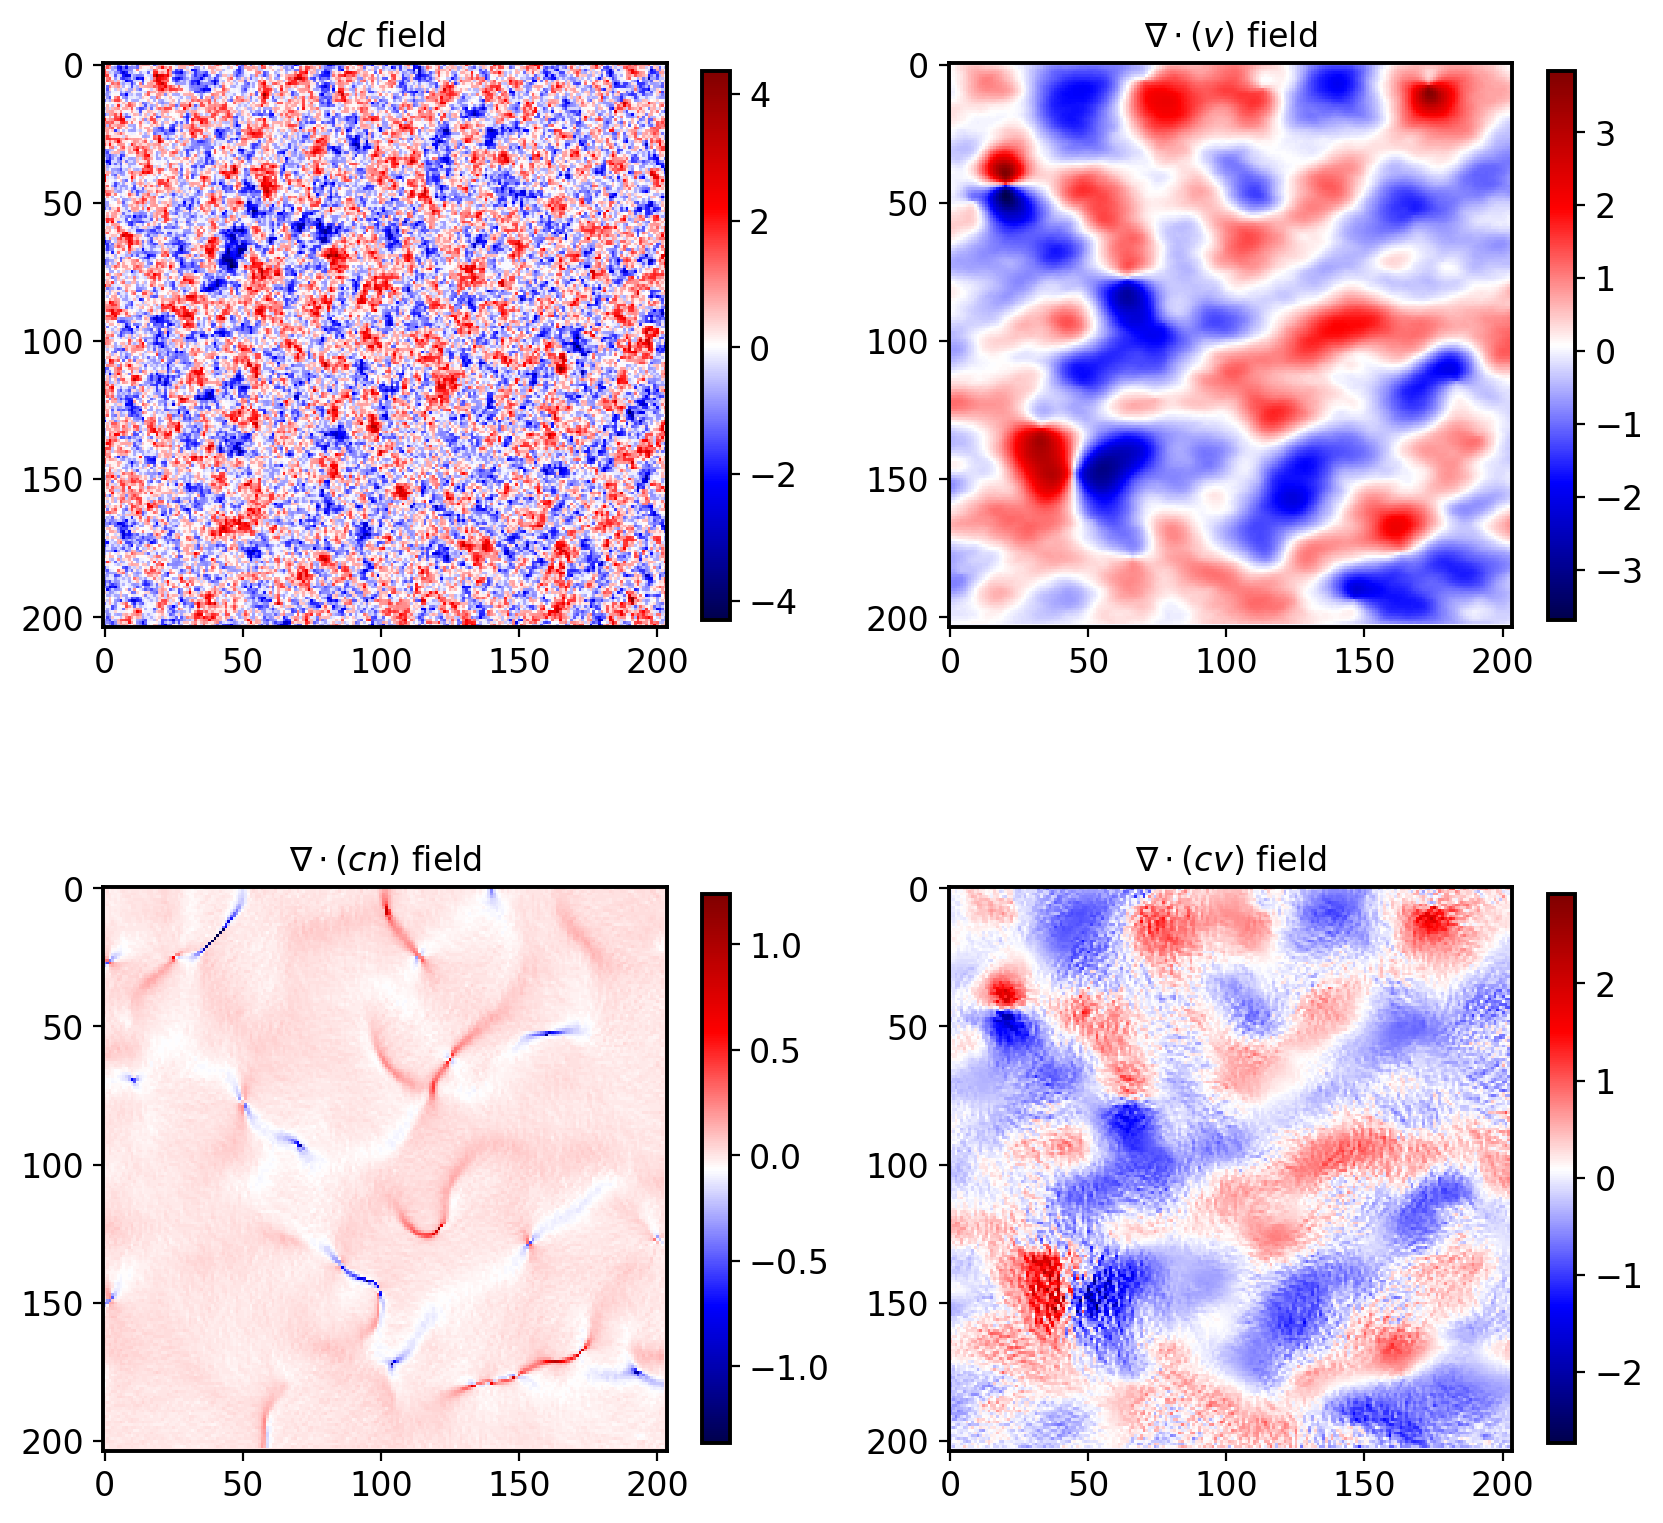

In [40]:
Dir = r'D:\Wei\Dynamics_raw\piv_result_10\80\900-901.csv'
img_folder = r'D:\Wei\Dynamics_raw\80'
dc_folder = r'D:\Wei\Dynamics_raw\80_diff'
dif = 10
pivData = pd.read_csv(Dir)
folder, file = os.path.split(Dir)
name_ind = file.find('-')
name = file[0: name_ind]

# dc = np.load(os.path.join(dc_folder, name + '.npy'))
imgDir = os.path.join(img_folder, name + '.tif')
imgDir1 = os.path.join(img_folder, str(int(int(name)+dif)) + '.tif')
img = io.imread(imgDir)
img1 = io.imread(imgDir1)
c, v, divcn, divcv, divv = cl.div_field(img, pivData, 10, 10)
X, Y, I0 = cl.divide_windows(img0, windowsize=[10, 10], step=10)
X, Y, I1 = cl.divide_windows(img1, windowsize=[10, 10], step=10)
dc = I1.astype('int32')-I0.astype('int32')
dc = signal.correlate2d(dc, mil.matlab_style_gauss2D((11, 11)), mode='same')
# Plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=200)
ax[0, 0].imshow(dc, cmap='seismic')
ax[0, 0].set_title('$dc$ field')
ax[0, 1].imshow(divv, cmap='seismic')
ax[0, 1].set_title('$\\nabla\cdot(v)$ field')
ax[1, 0].imshow(divcn, cmap='seismic')
ax[1, 0].set_title('$\\nabla\cdot(cn)$ field')
ax[1, 1].imshow(divcv, cmap='seismic')
ax[1, 1].set_title('$\\nabla\cdot(cv)$ field')

normdc = mpl.colors.Normalize(vmin=dc.min(), vmax=dc.max())
normv = mpl.colors.Normalize(vmin=divv.min(), vmax=divv.max())
normcv = mpl.colors.Normalize(vmin=divcv.min(), vmax=divcv.max())
normcn = mpl.colors.Normalize(vmin=divcn.min(), vmax=divcn.max())

plt.colorbar(mpl.cm.ScalarMappable(norm=normdc, cmap='seismic'), ax=ax[0, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normv, cmap='seismic'), ax=ax[0, 1], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcn, cmap='seismic'), ax=ax[1, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcv, cmap='seismic'), ax=ax[1, 1], shrink=0.8, drawedges=False)

# Coarse-grain the density field

Text(0.5, 1.0, 'dif = 10')

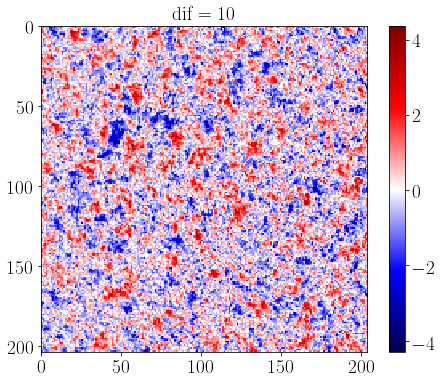

In [39]:
name = '900'
dif = 10
plt.figure(figsize=(8, 6))
img_folder = r'E:\Google Drive\data_share\Dynamics_raw\80'
img0 = io.imread(os.path.join(img_folder, '900.tif'))
img1 = io.imread(os.path.join(img_folder, str(int(int(name)+dif)) + '.tif'))
X, Y, I0 = cl.divide_windows(img0, windowsize=[10, 10], step=10)
X, Y, I1 = cl.divide_windows(img1, windowsize=[10, 10], step=10)
dc = I1.astype('int32')-I0.astype('int32')
dc = signal.correlate2d(dc, mil.matlab_style_gauss2D((11, 11)), mode='same')
plt.imshow(dc, cmap='seismic')
plt.colorbar()
plt.title('dif = {}'.format(dif))

# Difference between 16-bit and 8-bit

In [50]:
img16 = io.imread(r'D:\Wei\02042020\80-1\16-bit\0000.tif')
img8 = io.imread(r'D:\Wei\02042020\80-1\8-bit\0000.tif')

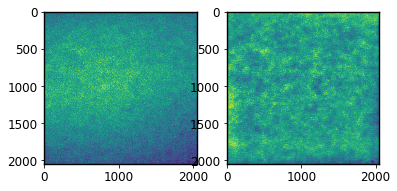

In [64]:
bp = mil.bpass(img8, 3, 100)
bp_mh = cl.match_hist(bp, img8)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img8)
ax[1].imshow(bp_mh)

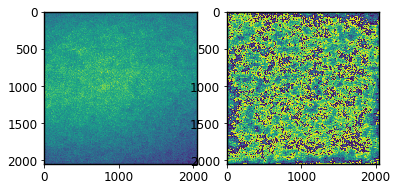

In [60]:
bp = mil.bpass(img16, 3, 100)
bp_mh = cl.match_hist(bp, img16)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img16)
ax[1].imshow(bp_mh)

# Where are the features?

## Try smoothing density fields and calculate difference

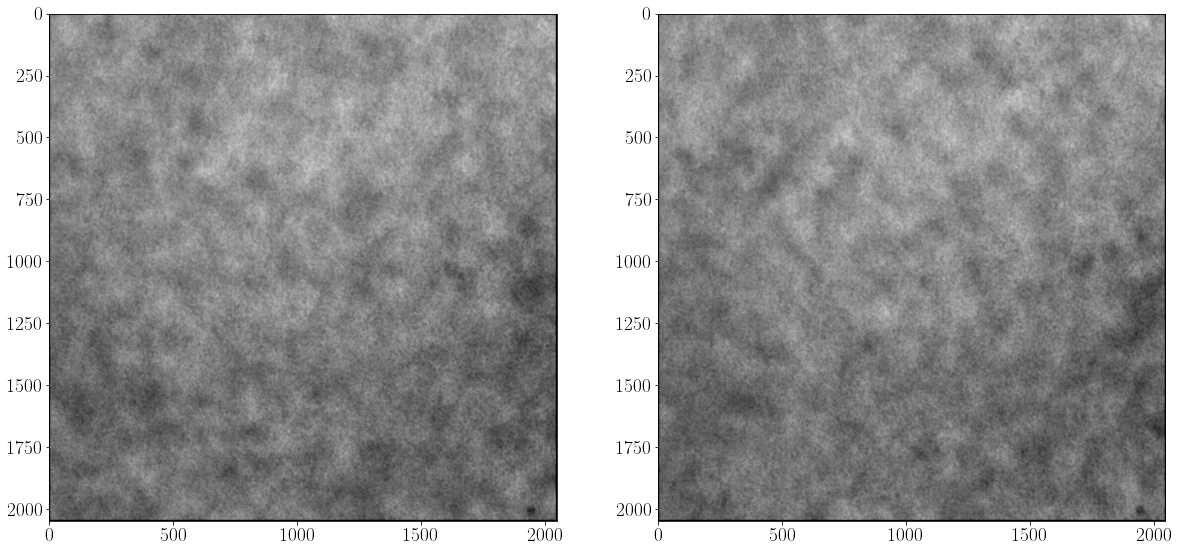

In [38]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\80'
I0 = io.imread(os.path.join(folder, '900.tif'))
I1 = io.imread(os.path.join(folder, '920.tif'))
sm0 = signal.convolve2d(I0, mil.matlab_style_gauss2D(shape=(51, 51), sigma=3), mode='same')
sm1 = signal.convolve2d(I1, mil.matlab_style_gauss2D(shape=(51, 51), sigma=3), mode='same')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(sm0, vmin=149, vmax=172, cmap='gray')
ax[1].imshow(sm1, vmin=149, vmax=172, cmap='gray')

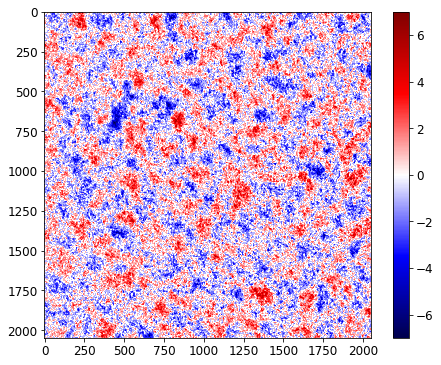

In [32]:
plt.figure(figsize=(8, 6))
plt.imshow(sm1.astype('int16')-sm0.astype('int16'), cmap='seismic')
plt.colorbar()

<b>Comment:</b> Here we try to identify density features (clusters, high density region) using subtraction. The result was noisy when the two frames are too close. When the two frames are well separated, the subtraction does not reflect and instantaneous density change. Thus, this approach does not work out.

## Add more statistics in the local density fluctuations?
Local density fluctuations are defined as density evolution in short time in a local region. The intensity difference between two frames is the simplest form of local density fluctuation. Despite of the simplicity, this direct difference is subject to significant noise from imaging techniques and the true fluctuation might be hindered. Hence, more statistics should be added to the local density fluctuation analysis. For example, I can take a local region concentration in a series of 10 consecutive frames. This time series can then be fitted to determine the trend (increase/decrease) and the magnitude of the trend. Finally, we plot the trend map, and compare it with the $\nabla\cdot v$ field.

* Construct a 3-D array consisting 10 frames of images (10, m, n), take 80/900 to 80/909 as an example.

In [40]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_bp'
stackL = []
for i in range(900, 910):
    img = io.imread(os.path.join(folder, str(i)+'.tif'))
    X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
    stackL.append(I)
stack = np.array(stackL)
stack.shape

(10, 102, 102)

* Fit the time series of concentration (light intensity average) with linear function.

Text(0, 0.5, 'intensity')

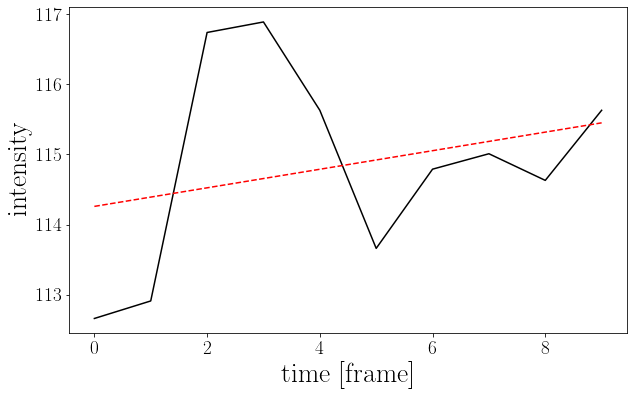

In [41]:
y = stack[:, 0, 0].flatten()
x = range(0, len(y))
p = np.polyfit(x, y, 1)
plt.plot(x, y, color='black')
plt.plot(x, p[0]*x+p[1], color='red', ls='--')
plt.xlabel('time [frame]')
plt.ylabel('intensity')

* Repeat the procedure over the whole image

In [42]:
local_fluctuation = np.zeros((stack.shape[1], stack.shape[2]))
for i in range(0, stack.shape[1]):
    for j in range(0, stack.shape[2]):
        y = stack[:, i, j].flatten()
        x = range(0, len(y))
        p = np.polyfit(x, y, 1)
        local_fluctuation[i, j] = p[0]

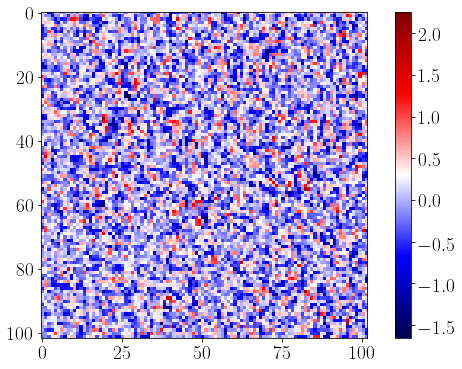

In [43]:
plt.imshow(local_fluctuation, cmap='seismic')
plt.colorbar()

<b style="color: red">Comment: </b>Fitting map shows similar results compared to direct subtraction map. It still subject to significant noise and no feature comparable to that in velocity field can be picked out.

## Try thresholded image?

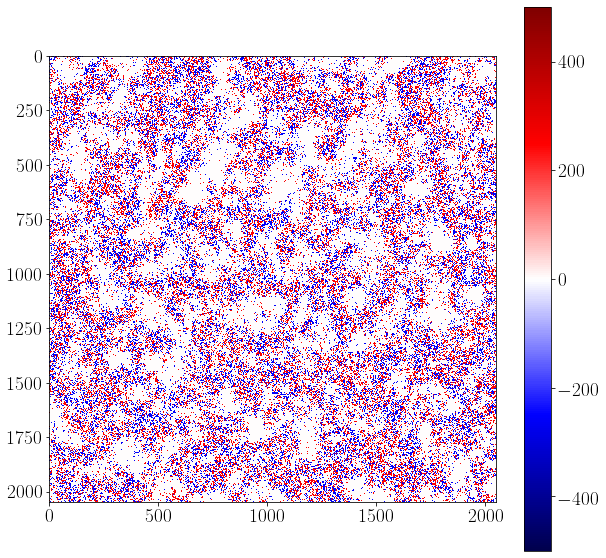

In [91]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_thre'
I0 = io.imread(os.path.join(folder, '900.tif')).astype('int16')
I1 = io.imread(os.path.join(folder, '903.tif')).astype('int16')
plt.figure(figsize=(10,10))
plt.imshow(I1-I0, cmap='seismic', vmin=-500, vmax=500)
plt.colorbar()

## Try fill hole?

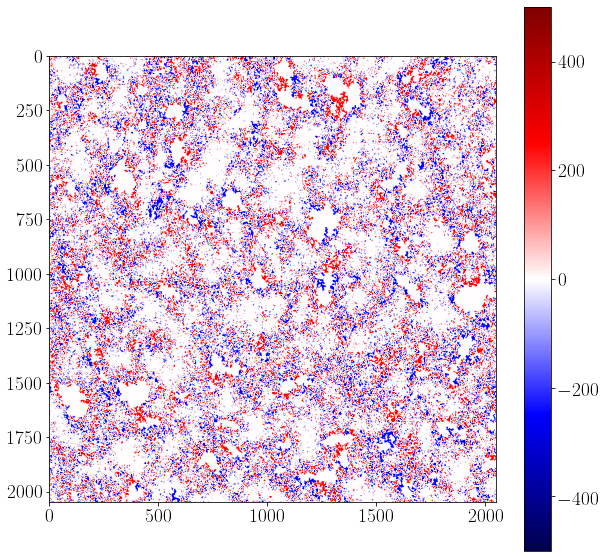

In [80]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole'
I0 = io.imread(os.path.join(folder, '900.tif')).astype('int16')
I1 = io.imread(os.path.join(folder, '903.tif')).astype('int16')
plt.figure(figsize=(10,10))
plt.imshow(-I1+I0, cmap='seismic', interpolation='spline16', vmin=-500, vmax=500)
plt.colorbar()

## Overlay PIV results

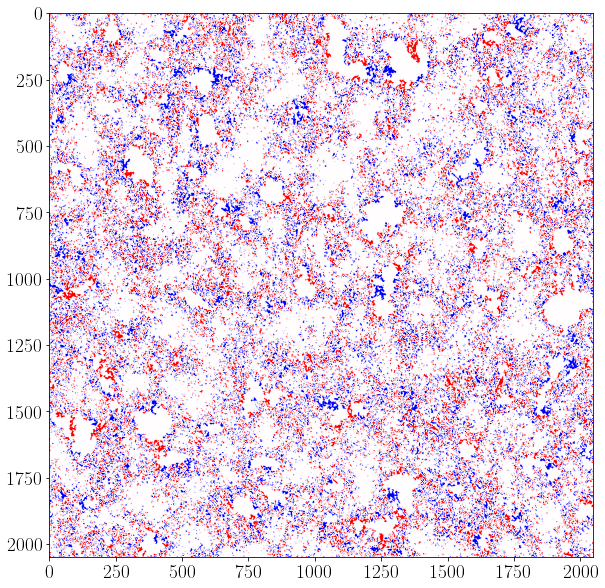

In [98]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole'
I0 = io.imread(os.path.join(folder, '900.tif')).astype('int16')
I1 = io.imread(os.path.join(folder, '901.tif')).astype('int16')
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(-I1+I0, cmap='seismic', interpolation='spline16', vmin=-500, vmax=500)
# plt.colorbar()
pivfolder = r'E:\Google Drive\data_share\Dynamics_raw\piv_result_50\80'
pivData = pd.read_csv(os.path.join(pivfolder, '900-901.csv'))
col = len(pivData.x.drop_duplicates())
row = len(pivData.y.drop_duplicates())
x = np.array(pivData.x).reshape(row, col)
y = np.array(pivData.y).reshape(row, col)
u = np.array(pivData.u).reshape(row, col)
v = np.array(pivData.v).reshape(row, col)
xs = x[0:row:2, 0:col:2]
ys = y[0:row:2, 0:col:2]
us = u[0:row:2, 0:col:2]
vs = v[0:row:2, 0:col:2]
# ax.quiver(xs, ys, us, vs, color=(0,0,0,0.7), width=0.003)

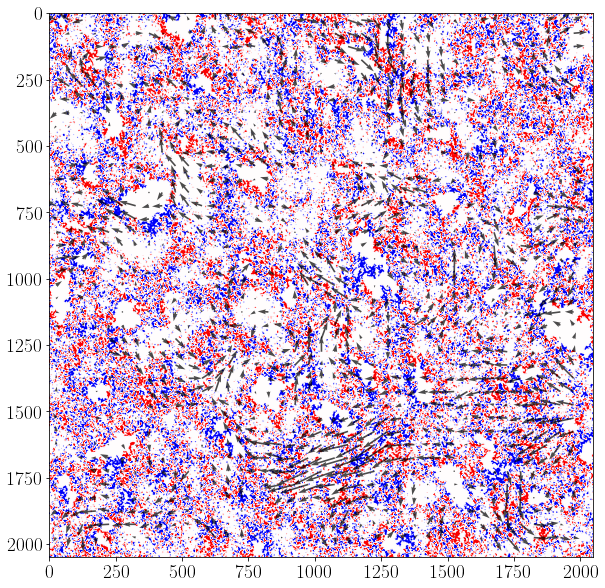

In [96]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole'
I0 = io.imread(os.path.join(folder, '950.tif')).astype('int16')
I1 = io.imread(os.path.join(folder, '955.tif')).astype('int16')
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(-I1+I0, cmap='seismic', interpolation='spline16', vmin=-500, vmax=500)
# plt.colorbar()
pivfolder = r'E:\Google Drive\data_share\Dynamics_raw\piv_result_50\80'
pivData = pd.read_csv(os.path.join(pivfolder, '950-951.csv'))
col = len(pivData.x.drop_duplicates())
row = len(pivData.y.drop_duplicates())
x = np.array(pivData.x).reshape(row, col)
y = np.array(pivData.y).reshape(row, col)
u = np.array(pivData.u).reshape(row, col)
v = np.array(pivData.v).reshape(row, col)
xs = x[0:row:2, 0:col:2]
ys = y[0:row:2, 0:col:2]
us = u[0:row:2, 0:col:2]
vs = v[0:row:2, 0:col:2]
ax.quiver(xs, ys, us, vs, color=(0,0,0,0.7), width=0.003)

## Put $\nabla\cdot v$ and direct subtraction together

Text(0.5, 1.0, '$\\nabla\\cdot v$')

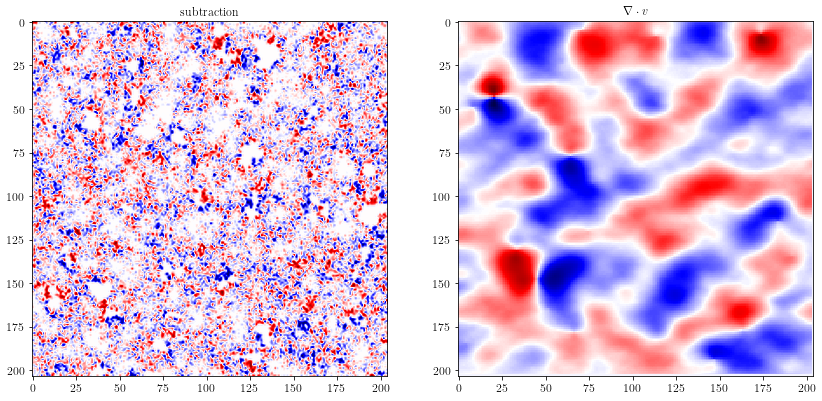

In [6]:
# Frame 900
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole'
I0 = io.imread(os.path.join(folder, '900.tif'))
I1 = io.imread(os.path.join(folder, '902.tif'))
X, Y, I0s = cl.divide_windows(I0, windowsize=[10, 10], step=10)
X, Y, I1s = cl.divide_windows(I1, windowsize=[10, 10], step=10)
I0s = I0s.astype('int16')
I1s = I1s.astype('int16')
pivData = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\piv_result_10\80\900-901.csv')
c, v, divcn, divcv, divv = cl.div_field(I0, pivData, 10, 10)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
ax[0].imshow(-I1s+I0s, cmap='seismic', interpolation='spline16')
ax[0].set_title('subtraction')
ax[1].imshow(divv, cmap='seismic')
ax[1].set_title('$\\nabla\cdot v$')

Text(0.5, 1.0, '$\\nabla\\cdot v$')

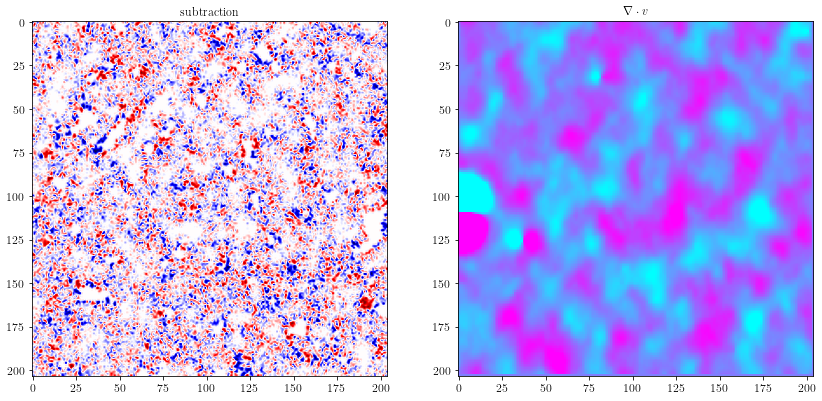

In [169]:
# Frame 920
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole'
I0 = io.imread(os.path.join(folder, '920.tif'))
I1 = io.imread(os.path.join(folder, '922.tif'))
X, Y, I0s = cl.divide_windows(I0, windowsize=[10, 10], step=10)
X, Y, I1s = cl.divide_windows(I1, windowsize=[10, 10], step=10)
I0s = I0s.astype('int16')
I1s = I1s.astype('int16')
pivData = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\piv_result_10\80\920-921.csv')
c, v, divcn, divcv, divv = cl.div_field(I0, pivData, 10, 10)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
ax[0].imshow(-I1s+I0s, cmap='seismic', interpolation='spline16')
ax[0].set_title('subtraction')
ax[1].imshow(divv, cmap='cool', vmax=3, vmin=-3)
ax[1].set_title('$\\nabla\cdot v$')

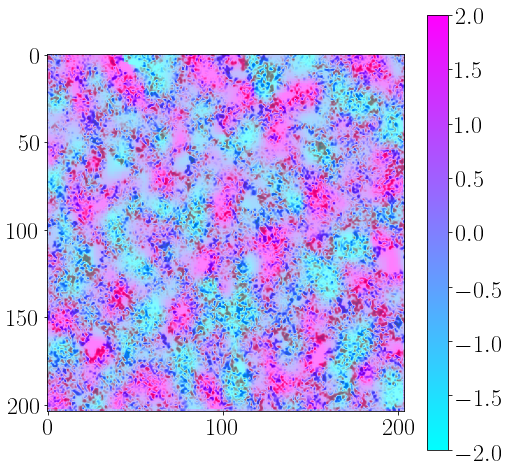

In [143]:
# Try overlay
folder = r'E:\Google Drive\data_share\Dynamics_raw\processed_image\80_fillhole'
I0 = io.imread(os.path.join(folder, '936.tif'))
I1 = io.imread(os.path.join(folder, '940.tif'))
X, Y, I0s = cl.divide_windows(I0, windowsize=[10, 10], step=10)
X, Y, I1s = cl.divide_windows(I1, windowsize=[10, 10], step=10)
I0s = I0s.astype('int16')
I1s = I1s.astype('int16')
pivData = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\piv_result_10\80\936-937.csv')
c, v, divcn, divcv, divv = cl.div_field(I0, pivData, 10, 10)
fig = plt.figure(figsize=(8, 8))
plt.imshow(divv, cmap='cool', vmax=2, vmin=-2)
plt.colorbar()
plt.imshow(-I1s+I0s, cmap='seismic', alpha=0.5, interpolation='spline16')

Text(0.5, 1.0, '$\\nabla\\cdot v$')

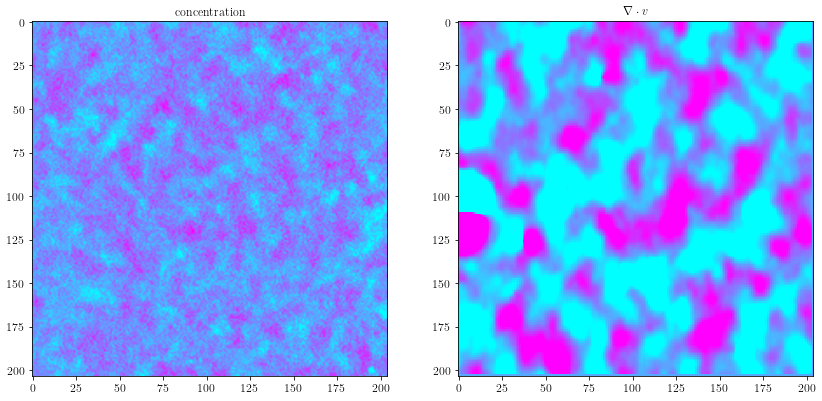

In [95]:
# div field alone
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_bp'
I0 = io.imread(os.path.join(folder, '920.tif'))
I1 = io.imread(os.path.join(folder, '930.tif'))
X, Y, I0s = cl.divide_windows(I0, windowsize=[10, 10], step=10)
X, Y, I1s = cl.divide_windows(I1, windowsize=[10, 10], step=10)
I0s = I0s.astype('int16')
I1s = I1s.astype('int16')
pivData = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\piv_result_10\80\920-921.csv')
c, v, divcn, divcv, divv = cl.div_field(I0, pivData, 10, 10)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
ax[0].imshow(I0s, cmap='cool', vmin=156, vmax=165, interpolation='spline16')
ax[0].set_title('concentration')
ax[1].imshow(divv, cmap='cool', vmax=2, vmin=-1)
ax[1].set_title('$\\nabla\cdot v$')

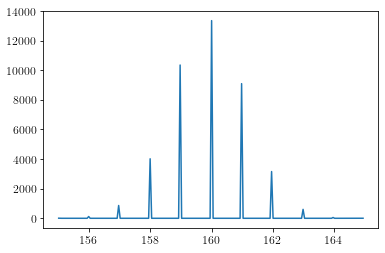

In [87]:
hist, bin_edges = np.histogram(I0s, bins='sqrt')
plt.plot(bin_edges[:-1], hist)

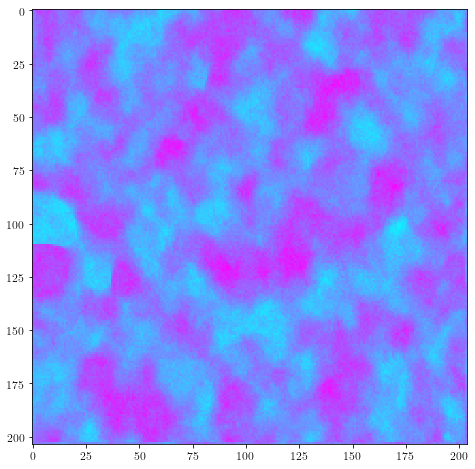

In [68]:
# Try overlay with c field
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_bp'
I0 = io.imread(os.path.join(folder, '920.tif'))
I1 = io.imread(os.path.join(folder, '921.tif'))
X, Y, I0s = cl.divide_windows(I0, windowsize=[10, 10], step=10)
X, Y, I1s = cl.divide_windows(I1, windowsize=[10, 10], step=10)
I0s = I0s.astype('int16')
I1s = I1s.astype('int16')
pivData = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\piv_result_10\80\920-921.csv')
c, v, divcn, divcv, divv = cl.div_field(I0, pivData, 10, 10)
fig = plt.figure(figsize=(8, 8))
plt.imshow(divv, cmap='cool', vmax=2, vmin=-2)
plt.imshow(I0s, cmap='cool', alpha=0.5)

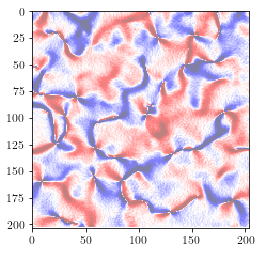

In [57]:
plt.imshow(divcn, cmap='seismic', alpha=0.5, vmin=-20, vmax=20)

In [53]:
hist, bin_edges = np.histogram(divcn, bins='sqrt')

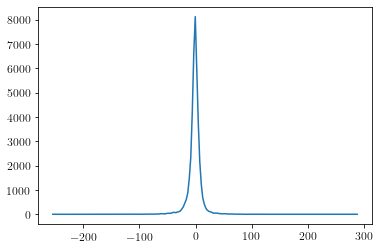

In [54]:
plt.plot(bin_edges[:-1], hist)

## Calculate divergence of velocity field in each frame

In [114]:
img = io.imread(r'E:\Google Drive\data_share\Dynamics_raw\20\0400.tif')
x, y, I = cl.divide_windows(img, windowsize=[50, 50], step=25)
folder = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\piv_result_50\20'
out_folder = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_50\20'
if os.path.exists(out_folder) == False:
    os.makedirs(out_folder)
l = cl.readdata(folder)
for num, i in l.iterrows():
    pivData = pd.read_csv(i.Dir)
    c, v, divcn, divcv, divv = cl.div_field(img, pivData, 50, 25)
    divData = pd.DataFrame().assign(x=x.flatten(), y=y.flatten(), div=divv.flatten())
    divData.to_csv(os.path.join(out_folder, i.Name + '.csv'))

In [109]:
divv.shape

(80, 80)

## Plot divergence / intensity evolution

In [105]:
# calculate concentration variation time series
out_folder = r'E:\Google Drive\data_share\Dynamics_raw\di_result_10\80'
if os.path.exists(out_folder) == False:
    os.makedirs(out_folder)
folder = r'E:\Google Drive\data_share\Dynamics_raw\80_bp'
l = cl.readseq(folder)
k = 0
for num, i in l.iterrows():
    if k == 0:
        I0 = io.imread(i.Dir)
        X, Y, I0s = cl.divide_windows(I0, windowsize=[10, 10], step=10)
        k += 1
    else:
        I1 = io.imread(i.Dir)
        X, Y, I1s = cl.divide_windows(I1, windowsize=[10, 10], step=10)
        dI = - I1s.astype('float16') + I0s.astype('float16') # concentration is negatively proportional to intensity
        dIData = pd.DataFrame().assign(x=X.flatten(), y=Y.flatten(), di=dI.flatten())
        dIData.to_csv(os.path.join(out_folder, '{0:d}-{1:d}.csv'.format(int(i.Name)-1, int(i.Name))))
        k = 0

In [ ]:
# scatter plot of time series of dI and div
# choose a point of interest

In [106]:
data = pd.read_csv(os.path.join(out_folder, '900-901.csv'))

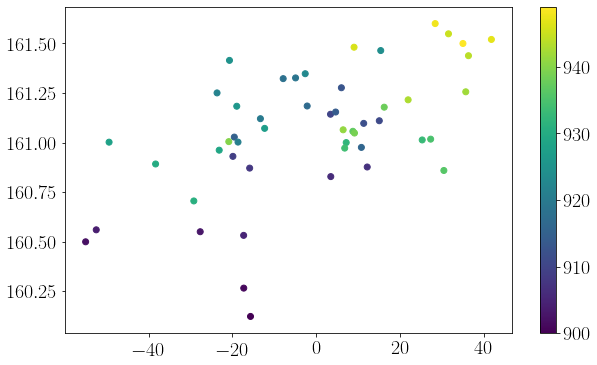

In [19]:
ldi = cl.readseq(r'E:\Google Drive\data_share\Dynamics_raw\processed_image\80_bp')
ldiv = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_50\80')
diL = []
divL = []
nameL = []
for di, div in zip(ldi.iterrows(), ldiv.iterrows()):
    name = di[1].Name
    nameL.append(int(name))
    di_data = io.imread(di[1].Dir)
    di_value = di_data[ 500-25:500+25,400-25:400+25].mean()
    diL.append(di_value)
    div_data = pd.read_csv(div[1].Dir)
    div_value = div_data['div'].loc[(div_data.x==400)&(div_data.y==500)].values[0]
    divL.append(div_value)

#     plt.text(di_value, div_value, name)
data = pd.DataFrame().assign(t=nameL, di=diL, div=divL)
data1 = data
# data1 = data.where(abs(data['div'])<10).dropna()
plt.scatter(data1['div'], data1['di'], c=data1['t'], cmap='viridis')
plt.colorbar()

In [12]:
di[1].Dir

'E:\\Google Drive\\data_share\\Dynamics_raw\\processed_image\\80_bp\\900.tif'

In [8]:
ldi

Empty DataFrame
Columns: [Name, Dir]
Index: []

In [165]:
# choose 100 points and plot 100 different evolutions [200:2000:200, 200:2000:200]
ldi = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\di_result_10\80')
ldiv = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80')
out_folder = r'E:\Google Drive\data_share\Dynamics_raw\di_div_evolution\80'
if os.path.exists(out_folder) == False:
    os.makedirs(out_folder)
xL = range(200, 2001, 200)
yL = range(200, 2001, 200)
for x in xL:
    for y in yL:
        diL = []
        divL = []
        nameL = []
        for di, div in zip(ldi.iterrows(), ldiv.iterrows()):
            name, name1 = di[1].Name.split('-')
            nameL.append(int(name))
            di_data = pd.read_csv(di[1].Dir)
            di_value = di_data['di'].loc[(di_data.x==x)&(di_data.y==y)].values[0]
            diL.append(di_value)
            div_data = pd.read_csv(div[1].Dir)
            div_value = div_data['div'].loc[(div_data.x==x)&(div_data.y==y)].values[0]
            divL.append(div_value)
        data = pd.DataFrame().assign(t=nameL, di=diL, div=divL)
        data1 = data.where(abs(data['div'])<10).dropna()
        plt.scatter(data1['div'], data1['di'], c=data1['t'], cmap='viridis')
        plt.colorbar()
        plt.savefig(os.path.join(out_folder, '{0:d}-{1:d}.png'.format(x, y)), dpi=100)
        plt.clf()

<Figure size 432x288 with 0 Axes>

## Autocorrelation between di and div

In [ ]:
ldi = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\di_result_10\80')
ldiv = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80')

In [211]:
ldi = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\di_result_10\80')
ldiv = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80')
diL = []
divL = []
nameL = []
for di, div in zip(ldi.iterrows(), ldiv.iterrows()):
    name, name1 = di[1].Name.split('-')
    nameL.append(int(name))
    di_data = pd.read_csv(di[1].Dir)
    di_value = di_data['di'].loc[(di_data.x==1000)&(di_data.y==1250)].values[0]
    diL.append(di_value)
    div_data = pd.read_csv(div[1].Dir)
    div_value = div_data['div'].loc[(div_data.x==1000)&(div_data.y==1250)].values[0]
    divL.append(div_value)
data = pd.DataFrame().assign(t=nameL, di=diL, div=divL)
data1 = data.where(abs(data['div'])<3).dropna()

Text(0, 0.5, 'correlation')

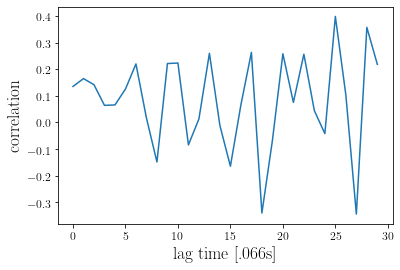

In [214]:
c = []
t = range(0, 30)
for tau in t:
    c1 = data1.di.corr(data1['div'].shift(periods=-tau))
    c.append(c1)
plt.plot(t, c)
plt.xlabel('lag time [.066s]')
plt.ylabel('correlation')

In [215]:
# calculate the autocorrelation at 100 different locations
ldi = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\di_result_10\80')
ldiv = cl.readdata(r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80')
data_folder = r'E:\Google Drive\data_share\Dynamics_raw\di_div_autocorr\80\data'
graph_folder = r'E:\Google Drive\data_share\Dynamics_raw\di_div_autocorr\80\graph'
if os.path.exists(data_folder) == False:
    os.makedirs(data_folder)
if os.path.exists(graph_folder) == False:
    os.makedirs(graph_folder)
xL = range(200, 2001, 200)
yL = range(200, 2001, 200)
for x in xL:
    for y in yL:
        diL = []
        divL = []
        nameL = []
        for di, div in zip(ldi.iterrows(), ldiv.iterrows()):
            name, name1 = di[1].Name.split('-')
            nameL.append(int(name))
            di_data = pd.read_csv(di[1].Dir)
            di_value = di_data['di'].loc[(di_data.x==x)&(di_data.y==y)].values[0]
            diL.append(di_value)
            div_data = pd.read_csv(div[1].Dir)
            div_value = div_data['div'].loc[(div_data.x==x)&(div_data.y==y)].values[0]
            divL.append(div_value)
        data = pd.DataFrame().assign(t=nameL, di=diL, div=divL)
        data1 = data.where(abs(data['div'])<10).dropna()
        c = []
        t = range(-30, 30)
        for tau in t:
            c1 = data1.di.corr(data1['div'].shift(periods=-tau))
            c.append(c1)
        adata = pd.DataFrame().assign(lagt=t, c=c)
        adata.to_csv(os.path.join(data_folder, '{0:d}-{1:d}.csv'.format(x, y)), index=False)
        plt.plot(t, c)
        plt.xlabel('lag time [.066s]')
        plt.ylabel('correlation')
        plt.savefig(os.path.join(graph_folder, '{0:d}-{1:d}.png'.format(x, y)), dpi=100)
        plt.clf()

<Figure size 432x288 with 0 Axes>

[-1, 2, -0.03, 0.03]

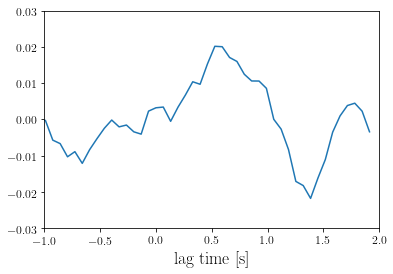

In [223]:
# averaging the autocorrelation
folder = r'E:\Google Drive\data_share\Dynamics_raw\di_div_autocorr\80\data'
l = cl.readdata(folder)
count = 0
for num, i in l.iterrows():
    if num == 0:
        data = pd.read_csv(i.Dir)
    else:
        data += pd.read_csv(i.Dir)
    count += 1
data /= count
plt.plot(data.lagt*0.066, savgol_filter(data.c, 11, 3))
plt.xlabel('lag time [s]')
plt.axis([-1, 2, -0.03, 0.03])

In [225]:
data.to_csv(r'E:\Google Drive\data_share\Dynamics_raw\di_div_autocorr\80\avg_autocorr.csv', index=False)

Text(0, 0.5, '$\\langle \\delta c(t) \\nabla\\cdot v(t+\\tau)\\rangle$')

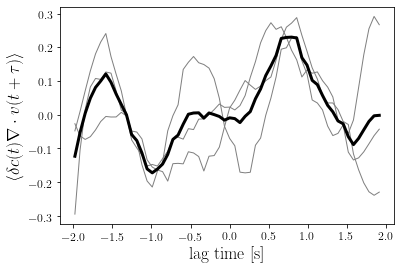

In [247]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\di_div_autocorr\80\data'
names = ['1200-200', '1600-600', '1800-1800']
count = 0
for name in names:
    data1 = pd.read_csv(os.path.join(folder, name+'.csv'))
    plt.plot(data1.lagt*0.066, savgol_filter(data1.c, 11, 3), lw=1, color='gray')
    if count == 0:
        data = data1
    else:
        data += data1
    count += 1
data /= count
plt.plot(data.lagt*0.066, savgol_filter(data.c, 11, 3), lw=3, color='black')
plt.xlabel('lag time [s]')
plt.ylabel('$\langle \delta c(t) \\nabla\cdot v(t+\\tau)\\rangle$')

# Correlation between concentraction field and divergence field
$\langle I\nabla\cdot v\rangle_t - \langle I\rangle_t\langle\nabla\cdot v\rangle_t$

In [2]:
div_folder = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
div = pd.read_csv(os.path.join(div_folder, '900-901.csv'))
div

Unnamed: 0     x     y       div
0               0     0     0  0.065764
1               1    10     0  0.119364
2               2    20     0  0.180727
3               3    30     0  0.256203
4               4    40     0  0.326634
5               5    50     0  0.381507
6               6    60     0  0.415496
7               7    70     0  0.446479
8               8    80     0  0.467814
9               9    90     0  0.481480
10             10   100     0  0.490263
11             11   110     0  0.469516
12             12   120     0  0.435726
13             13   130     0  0.402004
14             14   140     0  0.382715
15             15   150     0  0.382055
16             16   160     0  0.364766
17             17   170     0  0.334162
18             18   180     0  0.288189
19             19   190     0  0.243908
20             20   200     0  0.194175
21             21   210     0  0.141425
22             22   220     0  0.084138
23             23   230     0  0.026983
24             24   240     0 -0.023833
25             25   250     0 -0.065125
26             26   260     0 -0.107698
27             27   270     0 -0.158566
28             28   280     0 -0.205982
29             29   290     0 -0.256314
...           ...   ...   ...       ...
41586       41586  1740  2030  0.000000
41587       41587  1750  2030  0.000000
41588       41588  1760  2030  0.000000
41589       41589  1770  2030  0.000000
41590       41590  1780  2030  0.000000
41591       41591  1790  2030  0.000000
41592       41592  1800  2030  0.000000
41593       41593  1810  2030  0.000000
41594       41594  1820  2030  0.000000
41595       41595  1830  2030  0.000000
41596       41596  1840  2030  0.000000
41597       41597  1850  2030  0.000000
41598       41598  1860  2030  0.000000
41599       41599  1870  2030  0.000000
41600       41600  1880  2030  0.000000
41601       41601  1890  2030  0.000000
41602       41602  1900  2030  0.000000
41603       41603  1910  2030  0.000000
41604       41604  1920  2030  0.000000
41605       41605  1930  2030  0.000000
41606       41606  1940  2030  0.000000
41607       41607  1950  2030  0.000000
41608       41608  1960  2030  0.000000
41609       41609  1970  2030  0.000000
41610       41610  1980  2030  0.000000
41611       41611  1990  2030  0.000000
41612       41612  2000  2030  0.000000
41613       41613  2010  2030  0.000000
41614       41614  2020  2030  0.000000
41615       41615  2030  2030  0.000000

[41616 rows x 4 columns]

In [3]:
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())

In [7]:
div_field = np.array(div['div']).reshape(ylen, xlen)

In [9]:
div_field[0][1]

0.11936427145418095

In [10]:
folder_img = r'E:\Google Drive\data_share\Dynamics_raw\80'
I0 = io.imread(os.path.join(folder_img, '900.tif'))

In [12]:
X, Y, C = cl.divide_windows(I0, windowsize=[10, 10], step=10)

In [16]:
# Calculate correlation
div_field 

array([[161.41, 159.62, 159.87, ..., 162.69, 162.58, 160.23],
       [160.54, 160.49, 160.76, ..., 164.06, 162.84, 162.99],
       [160.98, 162.88, 161.04, ..., 164.  , 162.57, 163.34],
       ...,
       [159.35, 159.99, 159.41, ..., 158.72, 159.31, 159.96],
       [159.54, 159.56, 159.5 , ..., 159.06, 158.93, 158.02],
       [158.9 , 158.89, 159.48, ..., 159.13, 157.92, 158.16]])

In [25]:
folder_img = r'E:\Google Drive\data_share\Dynamics_raw\80'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
ldiv = cl.readdata(folder_div)
count = 0
for num, i in ldiv.iterrows():
    div = pd.read_csv(i.Dir)
    name = i.Name.split('-')[0]
    img = io.imread(os.path.join(folder_img, name+'.tif'))
    X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
    if count == 0:        
        Isum = I        
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divsum = divfield
        Idivsum = I * divfield
    else:
        Isum += I
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divsum += divfield
        Idivsum += I * divfield
    count += 1
Iavg = Isum / count
divavg = divsum / count
Idivavg = Idivsum / count

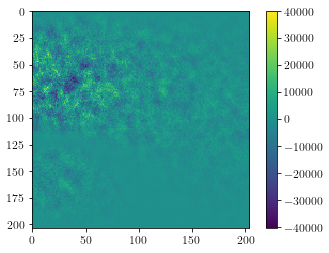

In [28]:
plt.imshow(Idivavg-divavg*Iavg)
plt.colorbar()

In [31]:
divavg

array([[ 245.52403811,  245.90889004,  243.22415915, ...,   47.3591178 ,
          48.49342918,    0.        ],
       [ 489.07527284,  490.89913048,  494.38683229, ...,   92.28738329,
          93.77863565,    0.        ],
       [ 732.95137128,  734.94974983,  734.23109618, ...,  141.57593034,
         140.12945226,    0.        ],
       ...,
       [-270.45515525, -270.24362661, -268.22346711, ...,   49.0383208 ,
          48.36541054,    0.        ],
       [-133.81488554, -136.93088802, -132.94746582, ...,   24.75896812,
          24.4467989 ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

# single frame correlation
$\frac{\langle I\nabla\cdot v\rangle_{xy} - \langle I\rangle_{xy}\langle\nabla\cdot v\rangle_{xy}}{\langle I\rangle_{xy}\langle\nabla\cdot v\rangle_{xy}}$

In [41]:
folder_img = r'E:\Google Drive\data_share\Dynamics_raw\80'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
div = pd.read_csv(os.path.join(folder_div, '900-901.csv'))
img = io.imread(os.path.join(folder_img, '900.tif'))
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())
divfield = np.array(div['div']).reshape(ylen, xlen)
X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
C = ((divfield * I).mean() - divfield.mean() * I.mean()) / divfield.mean() / I.mean()
C

-0.05493656764420361

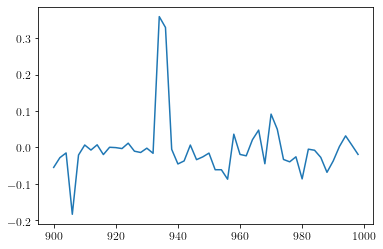

In [47]:
# Same frame
folder_img = r'E:\Google Drive\data_share\Dynamics_raw\80'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
ldiv = cl.readdata(folder_div)
CL = []
t = []
for num, i in ldiv.iterrows():
    div = pd.read_csv(i.Dir)
    name = i.Name.split('-')[0]
    img = io.imread(os.path.join(folder_img, name+'.tif'))
    xlen = len(div.x.drop_duplicates())
    ylen = len(div.y.drop_duplicates())
    divfield = np.array(div['div']).reshape(ylen, xlen)
    X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
    C = ((divfield * I).mean() - divfield.mean() * I.mean()) / divfield.mean() / I.mean()
    t.append(int(name))
    CL.append(C)
plt.plot(t, CL)

In [49]:
# time difference tau
folder_img = r'E:\Google Drive\data_share\Dynamics_raw\80'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
tauL = range(5, 50, 5)
CLL = []
for tau in tauL:
    print('Calculating tau = {:d}'.format(tau))
    CL = []
    t = []
    for num, i in ldiv.iterrows():
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900:
            continue
        img = io.imread(os.path.join(folder_img, img_name+'.tif'))
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
        C = ((divfield * I).mean() - divfield.mean() * I.mean()) / divfield.mean() / I.mean()
        t.append(int(name))
        CL.append(C)
    CLL.append(CL)

Calculating tau = 5
Calculating tau = 10
Calculating tau = 15
Calculating tau = 20
Calculating tau = 25
Calculating tau = 30
Calculating tau = 35
Calculating tau = 40
Calculating tau = 45


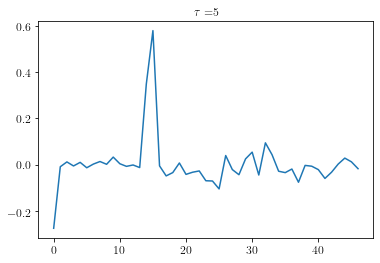

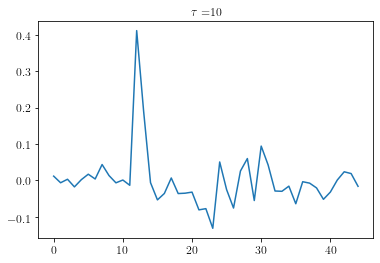

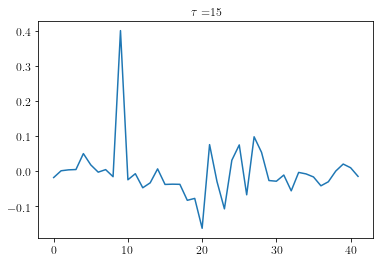

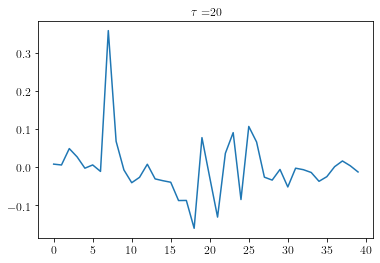

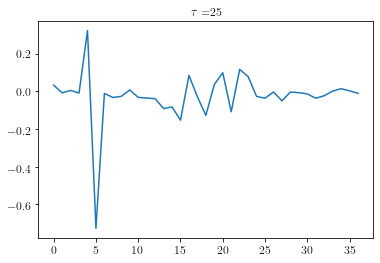

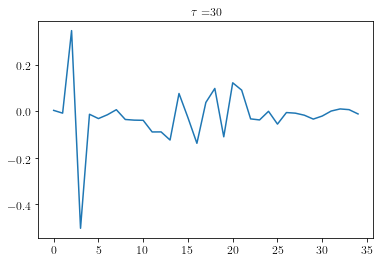

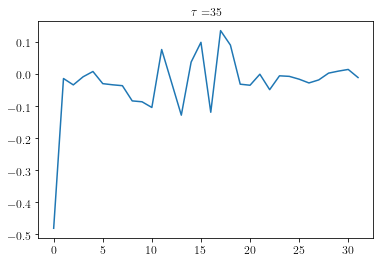

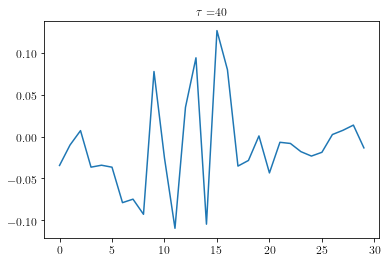

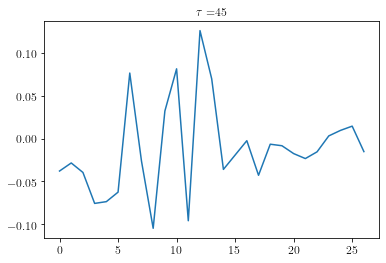

In [59]:
for tau, CL in zip(tauL, CLL):
    plt.figure()
    plt.title('$\\tau=$' + str(tau))
    plt.plot(CL)

<b style="color: red">Comment: </b>The autocorrelation between concentration field and divergence field shows __little__ correlation between the two at various concentrations. The peak value that appears when $\tau=5,10,15,20$ is likely to be random noise and could be averaged out if temporal average is taken.

* Correlation between thresholded subtraction field and divergence field
* Since interval = 2 frames gives pronounced feature in the subtraction field, I fix 2 frames as the interval for subtraction

In [6]:
# Calculate thresholded subtraction field
folder_img = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole'
folder_dif = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole_subtraction'
if os.path.exists(folder_dif) == False:
    os.makedirs(folder_dif)
l = cl.readseq(folder_img)
for num, i in l.iterrows():   
    name1 = str(int(i.Name)+2)
    print(name1)
    if int(name1) > 910:
        break
    else:
        I0 = io.imread(i.Dir)
        I1 = io.imread(os.path.join(folder_img, name1+'.tif'))
        dif = I1.astype('int32') - I0.astype('int32')
        np.savetxt(os.path.join(folder_dif, i.Name+'-'+name1+'.txt'), dif)

902
903
904
905
906
907
908
909
910
911


In [77]:
# time difference tau
folder_dif = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole_subtraction'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
ldiv = cl.readdata(folder_div)
tauL = range(0, 25, 5)
CLL = []
for tau in tauL:
    print('Calculating tau = {:d}'.format(tau))
    CL = []
    t = []
    count = 0
    for num, i in ldiv.iterrows():
        print(i.Name)
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900 or int(img_name) > 997:
            continue
        img = np.loadtxt(os.path.join(folder_dif, img_name+'-'+str(int(img_name)+2)+'.txt'))
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divfield = divfield - divfield.mean()
        X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
        I_norm = 1 - abs(I / abs(I).max())
        I_norm = I_norm - I_norm.mean()
        C = (divfield * I_norm).mean() / abs(divfield * I_norm).mean()
        t.append(int(name))
        CL.append(C)
        count += 1
        if count > 1:
            break
    CLL.append(CL)

Calculating tau = 0
900-901
902-903
Calculating tau = 5
900-901
902-903
904-905
906-907
908-909
Calculating tau = 10
900-901
902-903
904-905
906-907
908-909
910-911
912-913
Calculating tau = 15
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
Calculating tau = 20
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923


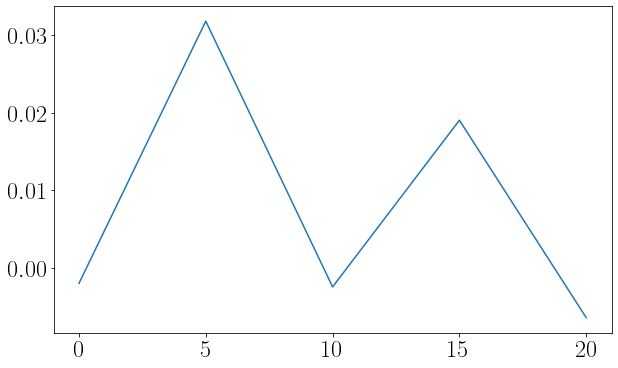

In [79]:
Cavg = []
for CL in CLL:
    Cavg.append(np.array(CL).mean())
plt.plot(tauL, Cavg)

In [7]:
img = np.loadtxt(os.path.join(folder_dif, '906-908.txt'))

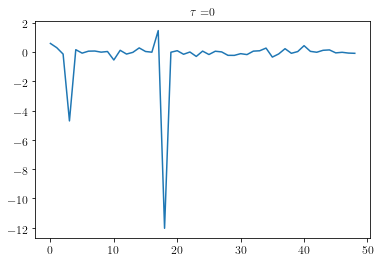

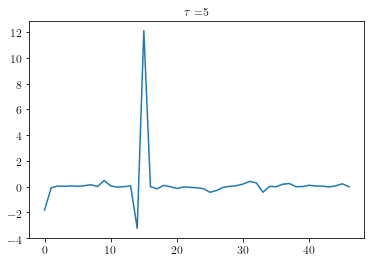

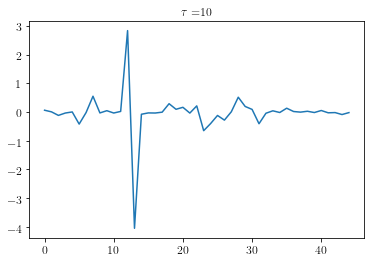

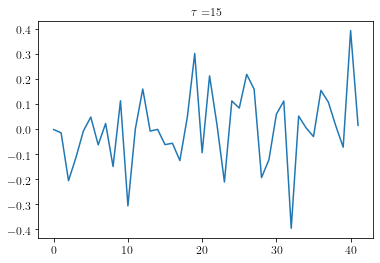

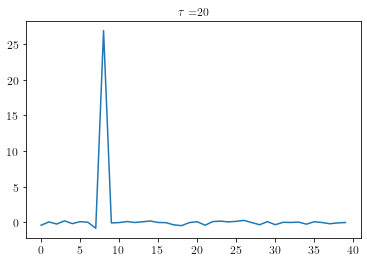

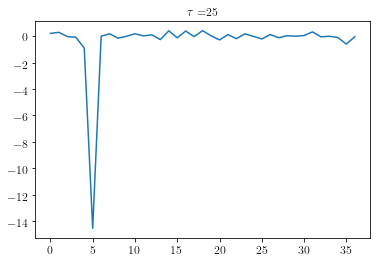

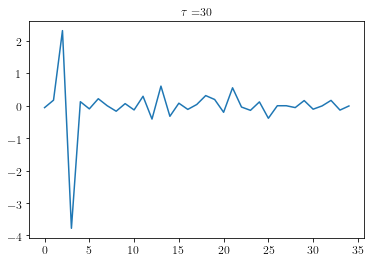

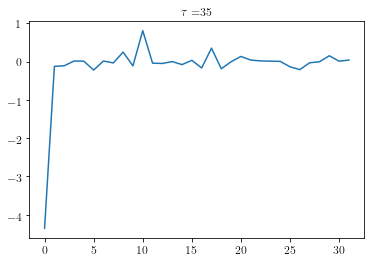

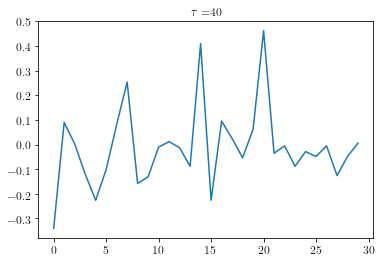

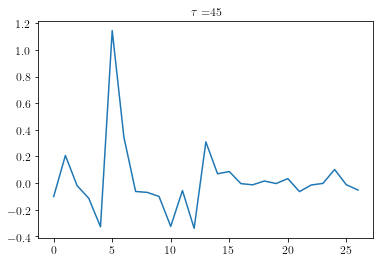

In [4]:
for tau, CL in zip(tauL, CLL):
    plt.figure()
    plt.title('$\\tau=$' + str(tau))
    plt.plot(CL)

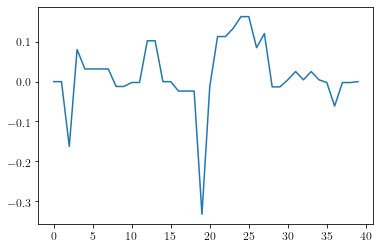

In [20]:
CL = signal.medfilt(CLL[4], kernel_size=5)
plt.plot(CL)

In [80]:
# time difference tau, change field scheme
folder_dif = r'E:\Google Drive\data_share\Dynamics_raw\processed_image\80_fillhole_subtraction'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_10\80'
folder_difxdiv_fillhole = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\difxdiv_fillhole'                        r''
if os.path.exists(folder_difxdiv_fillhole) == False:
    os.makedirs(folder_difxdiv_fillhole)
ldiv = cl.readdata(folder_div)
tauL = range(3, 25, 3)
CLL = []
for tau in tauL:
    print('Calculating tau = {:d}'.format(tau))
    CL = []
    t = []
    for num, i in ldiv.iterrows():
        print(i.Name)
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900 or int(img_name) > 997:
            continue
        img = np.loadtxt(os.path.join(folder_dif, img_name+'-'+str(int(img_name)+2)+'.txt'))
#         img = 1 - abs(img/abs(img).max())
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divfield_0mean = divfield - divfield.mean()
        X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
        I_0mean = I - I.mean()
        C = (divfield_0mean * I_0mean).mean() / abs(divfield_0mean*I_0mean).mean()
        t.append(int(img_name))
        CL.append(C)
    data = pd.DataFrame().assign(t=t, autocorr=CL)
    saveDir = os.path.join(folder_difxdiv_fillhole, 'tau={:d}'.format(tau), '80')
    if os.path.exists(saveDir) == False:
        os.makedirs(saveDir)
    data.to_csv(os.path.join(saveDir, 'data.csv'), index=False)
    CLL.append(CL)

Calculating tau = 3
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
Calculating tau = 6
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
Calculating tau = 9
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-

Text(0, 0.5, 'correlation')

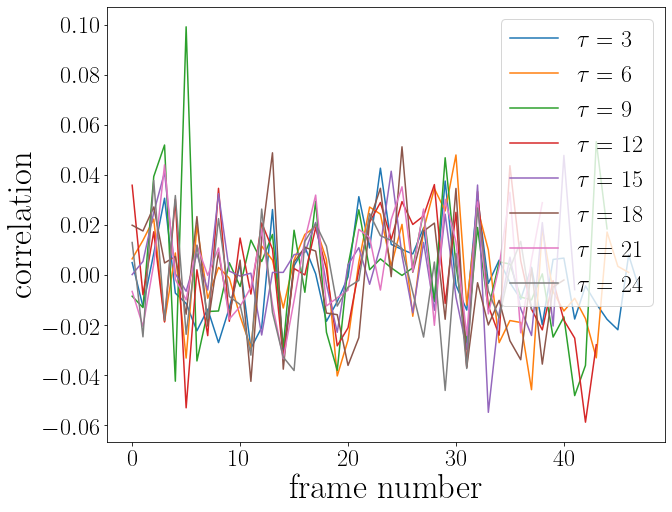

In [81]:
plt.figure(figsize=(10, 8))
for tau, CL in zip(tauL, CLL):
    plt.plot(CL, label=('$\\tau=$ ' + str(tau)))
plt.legend()
plt.xlabel('frame number')
plt.ylabel('correlation')

Text(0, 0.5, 'average correlation')

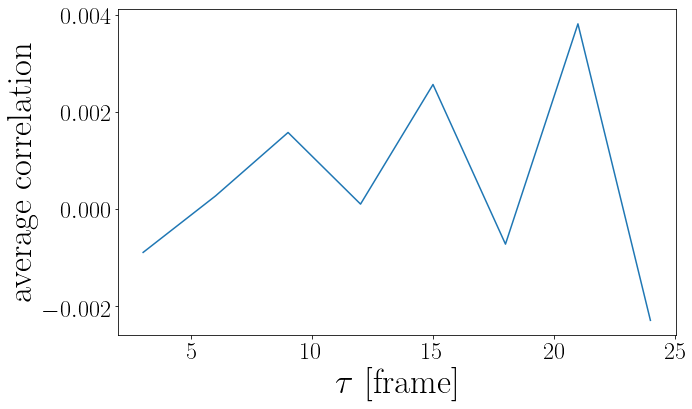

In [82]:
Cavg = []
for CL in CLL:
    Cavg.append(np.array(CL).mean())
plt.plot(tauL, Cavg)
plt.xlabel('$\\tau$ [frame]')
plt.ylabel('average correlation')

In [79]:
data = pd.DataFrame().assign(t=t, autocorr=CL)
saveDir = os.path.join(folder_difxdiv_fillhole, 'tau={:d}'.format(tau), '80')
if os.path.exists(saveDir) == False:
    os.makedirs(saveDir)
data.to_csv(os.path.join(saveDir, 'data.csv'), index=False)

Text(0, 0.5, 'correlation')

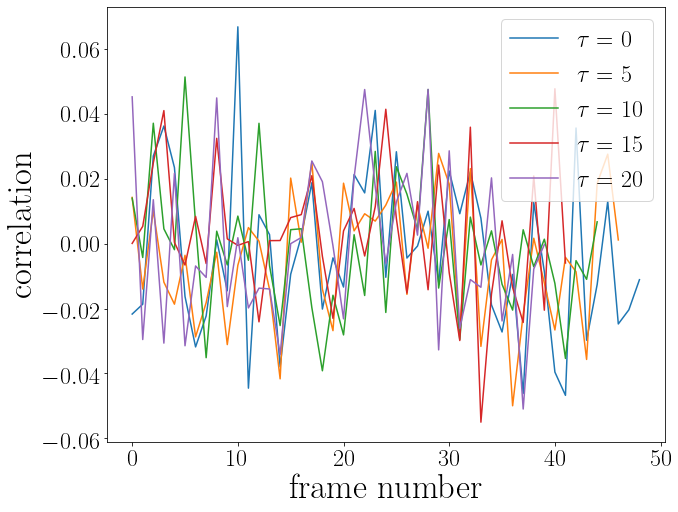

In [69]:
plt.figure(figsize=(10, 8))
for tau, CL in zip(tauL, CLL):
    plt.plot(CL, label=('$\\tau=$ ' + str(tau)))
plt.legend()
plt.xlabel('frame number')
plt.ylabel('correlation')

Text(0, 0.5, 'average correlation')

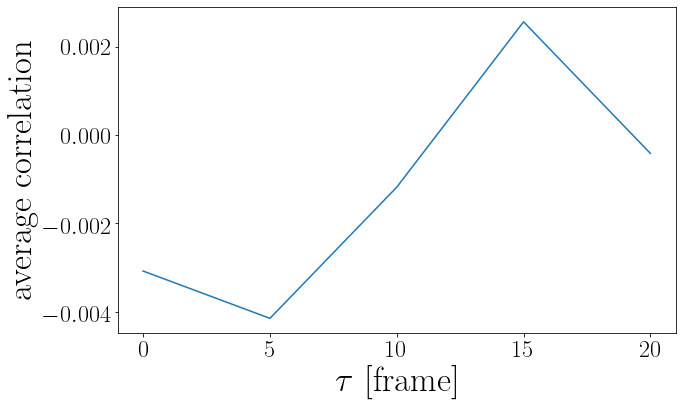

In [70]:
Cavg = []
for CL in CLL:
    Cavg.append(np.array(CL).mean())
plt.plot(tauL, Cavg)
plt.xlabel('$\\tau$ [frame]')
plt.ylabel('average correlation')

In [75]:
C = (divfield_0mean * -divfield_0mean).mean() / abs(divfield_0mean*divfield_0mean).mean()

#### Goals
* Try normalizing the autocorrelation using standard deviation
* Try density x divergence correlation (since we find density changes most around a cluster, where both density and divergence is not too high or too low, density and divergence should show a good correlation)
* abs(c-c.mean) x div (just changing the representation of c) ??
* thre density x div

Calculating tau = 0
900-901
902-903
Calculating tau = 5
900-901
902-903
904-905
906-907
908-909
Calculating tau = 10
900-901
902-903
904-905
906-907
908-909
910-911
912-913
Calculating tau = 15
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
Calculating tau = 20
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923


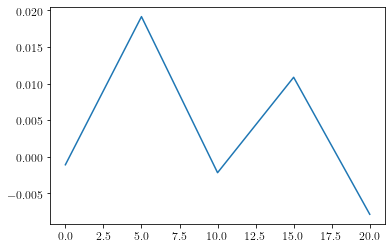

In [2]:
 # time difference tau
folder_dif = r'E:\Google Drive\data_share\Dynamics_raw\80_fillhole_subtraction'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
ldiv = cl.readdata(folder_div)
tauL = range(0, 25, 5)
CLL = []
for tau in tauL:
    print('Calculating tau = {:d}'.format(tau))
    CL = []
    t = []
    count = 0
    for num, i in ldiv.iterrows():
        print(i.Name)
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900 or int(img_name) > 997:
            continue
        img = np.loadtxt(os.path.join(folder_dif, img_name+'-'+str(int(img_name)+2)+'.txt'))
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divfield = divfield - divfield.mean()
        X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
        I_norm = 1 - abs(I / abs(I).max())
        I_norm = I_norm - I_norm.mean()
        C = (divfield * I_norm).mean() / divfield.std() / I_norm.std()
        t.append(int(name))
        CL.append(C)
        count += 1
        if count > 1:
            break
    CLL.append(CL)
Cavg = []
for CL in CLL:
    Cavg.append(np.array(CL).mean())
plt.plot(tauL, Cavg)

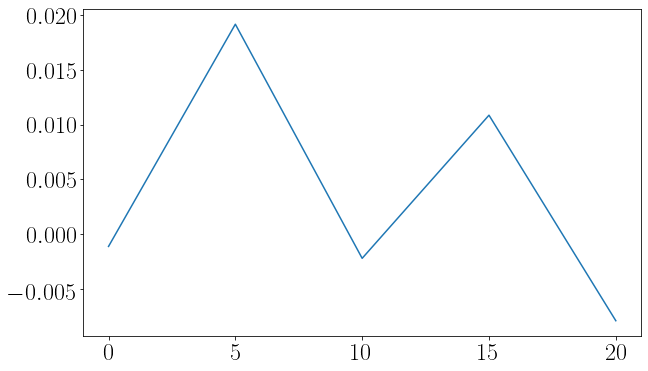

In [4]:
plt.plot(tauL, Cavg)

In [39]:
# Calculate divergence field of 100 n0 samples
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\60'
folder_piv = r'E:\Google Drive\data_share\Dynamics_raw\piv_result_10\60'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\60'
if os.path.exists(folder_div) == False:
    os.makedirs(folder_div)
l = cl.readdata(folder_piv)
for num, i in l.iterrows():
    pivData = pd.read_csv(i.Dir)
    name = i.Name.split('-')[0]
    img = io.imread(os.path.join(folder_den, name+'.tif'))
    X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
    c, v, divcn, divcv, divv = cl.div_field(img, pivData, 10, 10)
    div = pd.DataFrame().assign(x=X.flatten(), y=Y.flatten(), div=divv.flatten())
    div.to_csv(os.path.join(folder_div, i.Name+'.csv'), index=False)

In [42]:
# density x divergence
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\80_bp'
folder_piv = r'E:\Google Drive\data_share\Dynamics_raw\piv_result_10\80'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80'
lden = cl.readseq(folder_den)
ldiv = cl.readdata(folder_div)
tau = 0
tL = []
CL = []
for num, i in ldiv.iterrows():
    print(i.Name)
    div = pd.read_csv(i.Dir)
    name = i.Name.split('-')[0]
    img_name = name
    if int(img_name) < 900 or int(img_name) > 997:
        continue
    img = io.imread(os.path.join(folder_den, img_name + '.tif'))
    xlen = len(div.x.drop_duplicates())
    ylen = len(div.y.drop_duplicates())
    divfield = np.array(div['div']).reshape(ylen, xlen)
    divfield = divfield - divfield.mean()
    X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
    I_norm = I / abs(I).max()
    I_norm = I_norm - I_norm.mean()
    C = (divfield * I_norm).mean() / divfield.std() / I_norm.std()
    tL.append(int(img_name))
    CL.append(C)

900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999


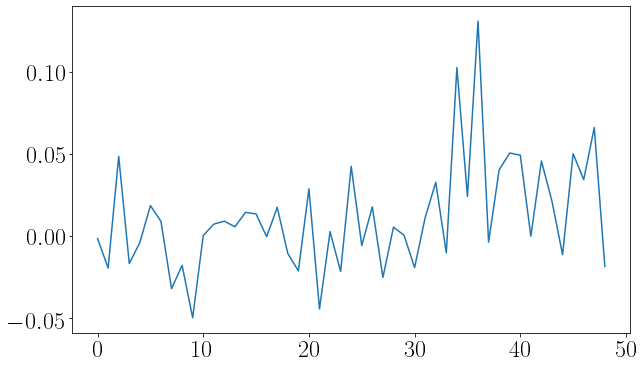

In [24]:
plt.plot(CL)

Text(0, 0.5, 'correlation')

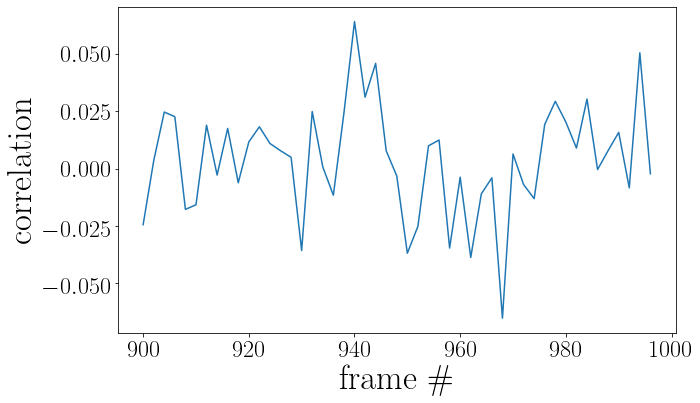

In [50]:
plt.plot(t, CL)
plt.xlabel('frame \#')
plt.ylabel('correlation')

In [38]:
data = pd.DataFrame().assign(frame=t, autocorr=CL)
folder_ixdiv = r'E:\Google Drive\data_share\Dynamics_raw\i_div_autocorr\tau=0\80'
if os.path.exists(folder_ixdiv) == False:
    os.makedirs(folder_ixdiv)
data.to_csv(os.path.join(folder_ixdiv, 'data.csv'))

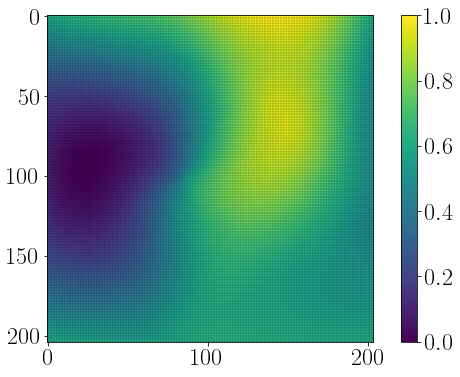

In [56]:
div = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\80\984-985.csv')
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())
divfield = np.array(div['div']).reshape(ylen, xlen)
pivdata = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\piv_result_10\80\984-985.csv')
plt.imshow(divfield)
plt.quiver(pivdata.x/10, pivdata.y/10, pivdata.u, pivdata.v)
plt.colorbar()

In [2]:
# Calculate divergence field of 100 n0 samples using piv_result_50
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\80'
folder_piv = r'E:\Google Drive\data_share\Dynamics_raw\piv_result_50\80'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_50\80'
if os.path.exists(folder_div) == False:
    os.makedirs(folder_div)
l = cl.readdata(folder_piv)
for num, i in l.iterrows():
    pivData = pd.read_csv(i.Dir)
    name = i.Name.split('-')[0]
    img = io.imread(os.path.join(folder_den, name+'.tif'))
    X, Y, I = cl.divide_windows(img, windowsize=[50, 50], step=25)
    c, v, divcn, divcv, divv = cl.div_field(img, pivData, 50, 25)
    div = pd.DataFrame().assign(x=X.flatten(), y=Y.flatten(), div=divv.flatten())
    div.to_csv(os.path.join(folder_div, i.Name+'.csv'), index=False)

In [70]:
I.shape

(80, 80)

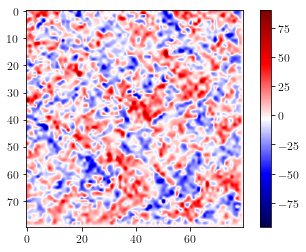

In [15]:
div = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\div_result_50\80\998-999.csv')
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())
divfield = np.array(div['div']).reshape(ylen, xlen)
plt.imshow(divfield, interpolation='spline16', cmap='seismic')
plt.colorbar()

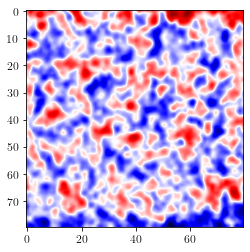

In [16]:
bp = mil.bpass(I, 3, 100)
plt.imshow(bp, interpolation='spline16', cmap='seismic')

In [11]:
bp0 = bp - bp.mean()
divfield0 = divfield - divfield.mean()
(bp0*divfield0).mean() / bp0.std() / divfield0.std()

0.06548390325819592

In [20]:
# density x divergence
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\80_thre'
folder_piv = r'E:\Google Drive\data_share\Dynamics_raw\piv_result_50\80'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_50\80'
lden = cl.readseq(folder_den)
ldiv = cl.readdata(folder_div)
tau = 0
tL = []
CL = []
for num, i in ldiv.iterrows():
    print(i.Name)
    div = pd.read_csv(i.Dir)
    name = i.Name.split('-')[0]
    img_name = name
    if int(img_name) < 900 or int(img_name) > 997:
        continue
    img = io.imread(os.path.join(folder_den, img_name + '.tif'))
    xlen = len(div.x.drop_duplicates())
    ylen = len(div.y.drop_duplicates())
    divfield = np.array(div['div']).reshape(ylen, xlen)
    divfield = divfield - divfield.mean()
    X, Y, I = cl.divide_windows(img, windowsize=[50, 50], step=25)
    I_norm = I / abs(I).max()
    I_norm = I_norm - I_norm.mean()
    C = (divfield * I_norm).mean() / divfield.std() / I_norm.std()
    tL.append(int(img_name))
    CL.append(C)

900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999


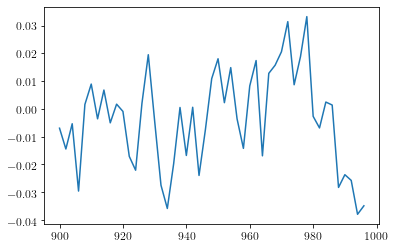

In [27]:
plt.plot(tL, CL)

In [22]:
np.array(CL).mean()

-0.0036021713896161652

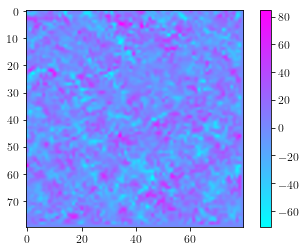

In [33]:
div = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\div_result_50\80\936-937.csv')
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())
divfield = np.array(div['div']).reshape(ylen, xlen)
plt.imshow(divfield, interpolation='spline16', cmap='cool')
plt.colorbar()

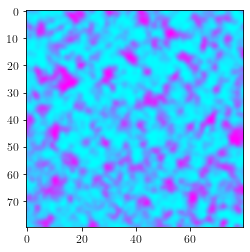

In [35]:
img =  io.imread(os.path.join(folder_den, '936.tif'))
X, Y, I = cl.divide_windows(img, windowsize=[50, 50], step=25)
plt.imshow(I, interpolation='spline16', cmap='cool')

In [36]:
bp = I
bp0 = bp - bp.mean()
divfield0 = divfield - divfield.mean()
(bp0*divfield0).mean() / bp0.std() / divfield0.std()

-0.01974806521936518

In [56]:
# thre density x divergence (cluster and divergence)
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\100'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\100'
folder_ixdiv = r'E:\Google Drive\data_share\Dynamics_raw\i_div_autocorr'
lden = cl.readseq(folder_den)
ldiv = cl.readdata(folder_div)
tauL = range(0, 25, 3)
CLL = []
for tau in tauL:
    CL = []
    tL = []
    for num, i in ldiv.iterrows():
        print(i.Name)
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900 or int(img_name) > 997:
            continue
        img = io.imread(os.path.join(folder_den, img_name + '.tif'))
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divfield = divfield - divfield.mean()
        X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
        I_norm = I / abs(I).max()
        I_norm = I_norm - I_norm.mean()
        tL.append(int(img_name))
        C = (divfield * I_norm).mean() / divfield.std() / I_norm.std()
        CL.append(C)
        data = pd.DataFrame().assign(t=tL, autocorr=CL)
        saveDir = os.path.join(folder_ixdiv, 'tau={:d}'.format(tau), '100')
        if os.path.exists(saveDir) == False:
            os.makedirs(saveDir)
        data.to_csv(os.path.join(saveDir, 'data.csv'), index=False)
    CLL.append(CL)

900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949


Text(0, 0.5, 'correlation')

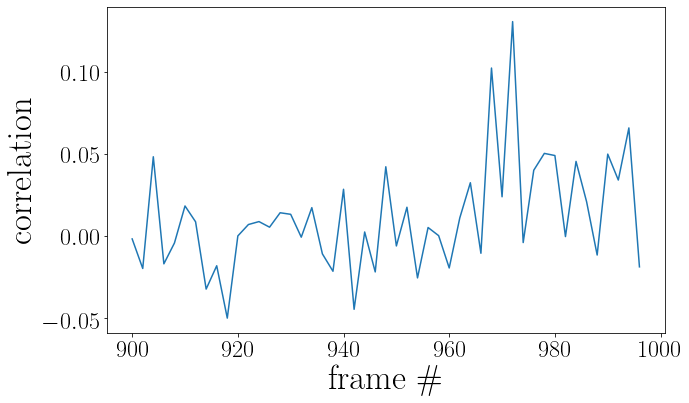

In [52]:
plt.plot(tL, np.array(CL))
plt.xlabel('frame \#')
plt.ylabel('correlation')

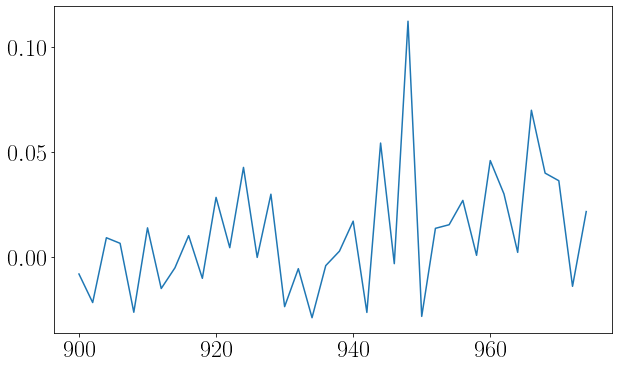

In [58]:
plt.plot(data.t, data.autocorr)

In [67]:
data = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\i_div_autocorr\tau=21\100\data.csv')
data.autocorr.mean()

0.010930793182366118

In [ ]:
# thre density x divergence (cluster and divergence)
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\100'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\100'
folder_ixdiv = r'E:\Google Drive\data_share\Dynamics_raw\i_div_autocorr'
lden = cl.readseq(folder_den)
ldiv = cl.readdata(folder_div)
tauL = range(0, 25, 3)
CLL = []
for tau in tauL:
    CL = []
    tL = []
    for num, i in ldiv.iterrows():
        print(i.Name)
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900 or int(img_name) > 997:
            continue
        img = io.imread(os.path.join(folder_den, img_name + '.tif'))
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divfield = divfield - divfield.mean()
        X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
        I_norm = I / abs(I).max()
        I_norm = I_norm - I_norm.mean()
        tL.append(int(img_name))
        C = (divfield * I_norm).mean() / divfield.std() / I_norm.std()
        CL.append(C)
        data = pd.DataFrame().assign(t=tL, autocorr=CL)
        saveDir = os.path.join(folder_ixdiv, 'tau={:d}'.format(tau), '100')
    if os.path.exists(saveDir) == False:
        os.makedirs(saveDir)
    data.to_csv(os.path.join(saveDir, 'data.csv'), index=False)
    CLL.append(CL)

# Identify divergence boundaries
* change the representation of density field: $I'=1-|I|/max(|I|))$
* change the representation of divergence field: 
    * $\nabla\cdot v'=1$ when $-1<\nabla\cdot<1$ 
    * $\nabla\cdot v'=0$ when $\nabla\cdot v\le-1$ or $\nabla\cdot v\ge1$

In [ ]:
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\100'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\div_result_10\100'
folder_ixdiv = r'E:\Google Drive\data_share\Dynamics_raw\i_div_autocorr'
lden = cl.readseq(folder_den)
ldiv = cl.readdata(folder_div)
tauL = [0]
CLL = []
for tau in tauL:
    CL = []
    tL = []
    for num, i in ldiv.iterrows():
        print(i.Name)
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900 or int(img_name) > 997:
            continue
        img = io.imread(os.path.join(folder_den, img_name + '.tif'))
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divfield_ = divfield.copy()
        divfield[divfield_>=1] = 0
        divfield[divfield_<=-1] = 0
        divfield[(divfield_<1) and (divfield_>-1)] = 1
        divfield = divfield - divfield.mean()
        X, Y, I = cl.divide_windows(img, windowsize=[10, 10], step=10)
        I_norm = I / abs(I).max()
        I_norm = I_norm - I_norm.mean()
        tL.append(int(img_name))
        C = (divfield * I_norm).mean() / divfield.std() / I_norm.std()
        CL.append(C)
#         data = pd.DataFrame().assign(t=tL, autocorr=CL)
#         saveDir = os.path.join(folder_ixdiv, 'tau={:d}'.format(tau), '100')
#         if os.path.exists(saveDir) == False:
#             os.makedirs(saveDir)
#         data.to_csv(os.path.join(saveDir, 'data.csv'), index=False)
    CLL.append(CL)

In [83]:
divfield

array([[-0.09253367, -0.03152033,  0.10813324, ..., -1.09553464,
        -0.59322011,  0.        ],
       [-0.204194  , -0.11353773,  0.04490635, ..., -1.15946206,
        -0.70185422,  0.        ],
       [-0.16505676, -0.1411768 , -0.00334614, ..., -1.13799876,
        -0.73922229,  0.        ],
       ...,
       [ 1.00968136,  1.15675884,  1.27206182, ..., -0.69867716,
        -0.66480571,  0.        ],
       [ 0.58170933,  0.80559663,  0.98274095, ..., -0.39318136,
        -0.34610283,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
divfield_ = divfield
divfield[divfield_>=1] = 0
divfield[divfield_<=-1] = 0
divfield[(divfield_<1)&(divfield_>-1)] = 1

In [87]:
divfield.min()

1.0

In [357]:
div = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_10\80\920-921.csv')
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())
divfield = np.array(div['div']).reshape(ylen, xlen)
cutoff = abs(divfield).mean()
idx0 = (divfield>=cutoff)|(divfield<=-cutoff)
idx1 = (divfield<cutoff)&(divfield>-cutoff)
divfield[idx0] = 0
divfield[idx1] = 1

In [345]:
I = np.loadtxt(r'E:\Google Drive\data_share\Dynamics_raw\processed_image\80_fillhole_subtraction\920-922.txt')
I = abs(I)/255
X, Y, Ic = cl.divide_windows(I, windowsize=[10, 10], step=10)
cutoff = abs(Ic).mean()
idx0 = abs(Ic) < cutoff
idx1 = abs(Ic) >= cutoff
Ic[idx0] = 0
Ic[idx1] = 1

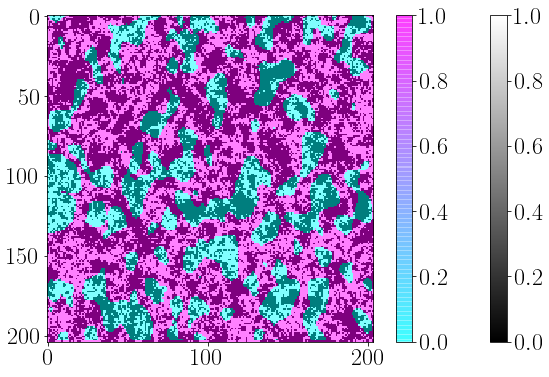

In [347]:
plt.imshow(Ic, cmap='gray')
plt.colorbar()
plt.imshow(divfield, cmap='cool', alpha=0.5)
plt.colorbar()

In [348]:
((divfield - divfield.mean()) * (Ic - Ic.mean())).mean() / (divfield - divfield.mean()).std() / (Ic - Ic.mean()).std()

0.007507750799077428

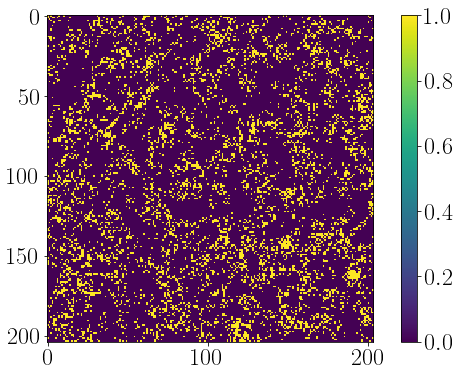

In [233]:
plt.imshow(Ic)
plt.colorbar()

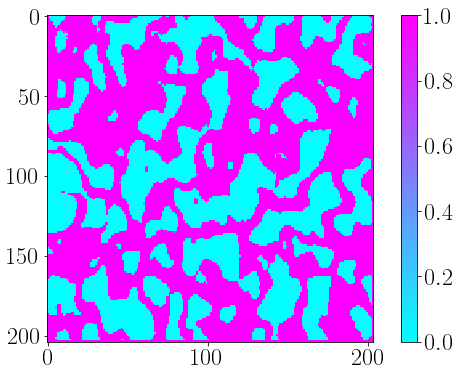

In [234]:
plt.imshow(divfield, cmap='cool')
plt.colorbar()

# Thres density x thres divergence

In [587]:
div = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_10\80\940-941.csv')
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())
divfield = np.array(div['div']).reshape(ylen, xlen)
cutoff = divfield.mean()
idx0 = divfield<=-cutoff
idx1 = divfield>cutoff
divfield[idx0] = -1
divfield[idx1] = 1

In [55]:
I = -io.imread(r'E:\Google Drive\data_share\Dynamics_raw\processed_image\80_bp\950.tif')
X, Y, Ic = cl.divide_windows(I, windowsize=[10, 10], step=10)
cutoff = filters.threshold_yen(Ic)
# binary = Ic > cutoff
idx0 = Ic < cutoff
idx1 = Ic > cutoff
Ic[idx0] = 0
Ic[idx1] = 1

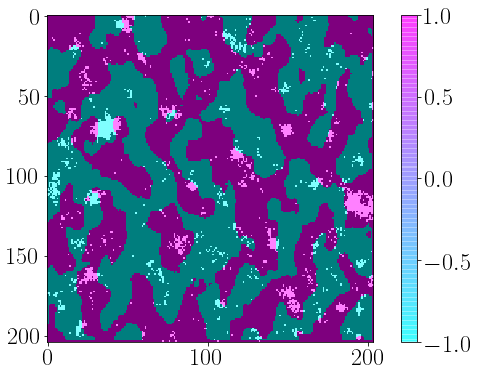

In [581]:
plt.imshow(binary, cmap='gray')
plt.imshow(divfield, cmap='cool', alpha=0.5)
plt.colorbar()

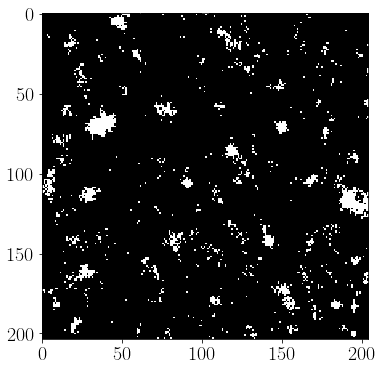

In [56]:
plt.imshow(Ic, cmap='gray')

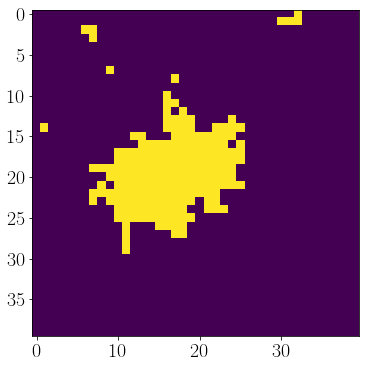

In [57]:
plt.imshow(Ic[50:90, 20:60])

In [588]:
((divfield - divfield.mean()) * (Ic - Ic.mean())).mean() / (divfield - divfield.mean()).std() / (Ic - Ic.mean()).std()

-0.02583620930560153

# Look at local region

In [46]:
div = pd.read_csv(r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_50\80\940-941.csv')
xlen = len(div.x.drop_duplicates())
ylen = len(div.y.drop_duplicates())
divfield = np.array(div['div']).reshape(ylen, xlen)

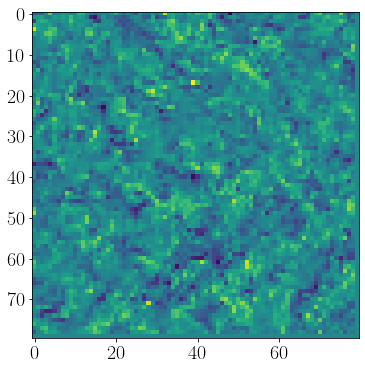

In [50]:
plt.imshow(divfield)

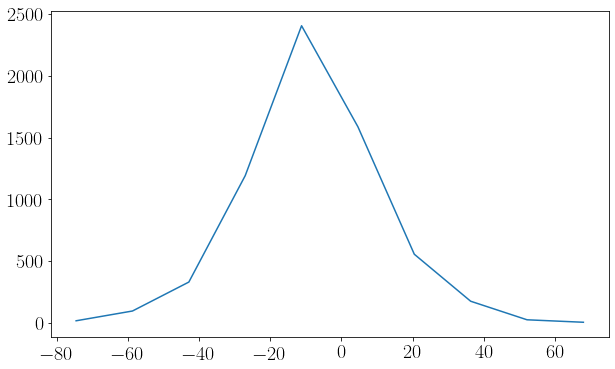

In [51]:
hist, bin_edge = np.histogram(divfield)
plt.plot(bin_edge[:-1], hist)

In [12]:
divfield_crop = divfield[35:85, 25:65]
# index order: y - x

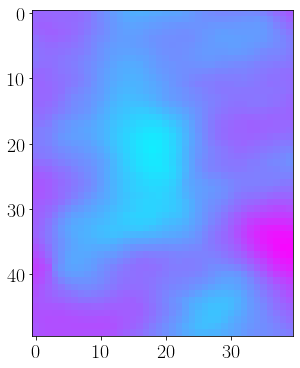

In [14]:
plt.imshow(divfield_crop, vmax=3, vmin=-3, cmap='cool')

In [54]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_50\80'
folder_out = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_50_local\80'
if os.path.exists(folder_out) == False:
    os.makedirs(folder_out)
l = cl.readdata(folder)
for num, i in l.iterrows():
    div = pd.read_csv(i.Dir)
    xlen = len(div.x.drop_duplicates())
    ylen = len(div.y.drop_duplicates())
    divfield = np.array(div['div']).reshape(ylen, xlen)
    divfield_crop = divfield[20:36, 8:24]
    plt.imshow(divfield_crop, vmax=30, vmin=-30, cmap='cool', interpolation='spline16')
    plt.savefig(os.path.join(folder_out, i.Name+'.png'))
    plt.clf()

<Figure size 720x432 with 0 Axes>

In [17]:
xgrad = np.array([[-1, 0, 1],
                  [-1, 0, 1],
                  [-1, 0, 1]])
ygrad = xgrad.transpose()

In [20]:
divfield_crop

array([[ 1.06292356,  1.15241365,  1.21592248, ...,  0.56387773,
         0.57724642,  0.48531819],
       [ 0.96685382,  1.01653327,  1.05139924, ...,  0.5593277 ,
         0.59010509,  0.5072273 ],
       [ 0.74745699,  0.76314146,  0.7508596 , ...,  0.43088655,
         0.44748929,  0.40036441],
       ...,
       [-0.18894352, -0.36604241, -0.57722932, ..., -2.23432541,
        -2.18085125, -2.04831984],
       [-0.3106335 , -0.4151847 , -0.59376703, ..., -2.53143033,
        -2.47513165, -2.30148098],
       [-0.38936661, -0.50710584, -0.66815345, ..., -2.63164511,
        -2.56626609, -2.39988384]])

In [21]:
divfield[35, 25]

1.0629235573512952

In [24]:
div['div'].loc[(div.y==350)&(div.x==250)]

7165    1.062924
Name: div, dtype: float64

In [151]:
# local region density divergence correlation
folder_den = r'E:\Google Drive\data_share\Dynamics_raw\processed_image\40_bp'
folder_div = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\div_result_50\40'
folder_ixdiv = r'E:\Google Drive\data_share\Dynamics_raw\concentration_velocity_field\i_div_autocorr\40'
lden = cl.readseq(folder_den)
ldiv = cl.readdata(folder_div)
tauL = range(-90, 90, 3)
CLL = []
for tau in tauL:
    CL = []
    tL = []
    for num, i in ldiv.iterrows():
        print(i.Name)
        div = pd.read_csv(i.Dir)
        name = i.Name.split('-')[0]
        img_name = str(int(name) - tau)
        if int(img_name) < 900 or int(img_name) > 997:
            continue
        img = io.imread(os.path.join(folder_den, img_name + '.tif'))
        xlen = len(div.x.drop_duplicates())
        ylen = len(div.y.drop_duplicates())
        divfield = np.array(div['div']).reshape(ylen, xlen)
        divfield = divfield - divfield.mean()
        divfield_crop = divfield#[20:36, 8:24]
        X, Y, I = cl.divide_windows(img, windowsize=[50, 50], step=25)
        I_norm = I / abs(I).max()
        I_norm = I_norm - I_norm.mean()
        I_crop = I_norm#[20:36, 8:24]
        tL.append(int(img_name))
        C = (divfield_crop * I_crop).mean() / divfield_crop.std() / I_crop.std()
        CL.append(C)
        data = pd.DataFrame().assign(t=tL, autocorr=CL)
        saveDir = os.path.join(folder_ixdiv, 'tau={:d}'.format(tau))
        if os.path.exists(saveDir) == False:
            os.makedirs(saveDir)
        data.to_csv(os.path.join(saveDir, 'data.csv'), index=False)
    CLL.append(CL)

900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949


950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999


906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955
956-957
958-959
960-961
962-963
964-965
966-967
968-969
970-971
972-973
974-975
976-977
978-979
980-981
982-983
984-985
986-987
988-989
990-991
992-993
994-995
996-997
998-999
900-901
902-903
904-905
906-907
908-909
910-911
912-913
914-915
916-917
918-919
920-921
922-923
924-925
926-927
928-929
930-931
932-933
934-935
936-937
938-939
940-941
942-943
944-945
946-947
948-949
950-951
952-953
954-955


In [102]:
I_crop.shape

(81, 81)

Text(0, 0.5, 'correlation')

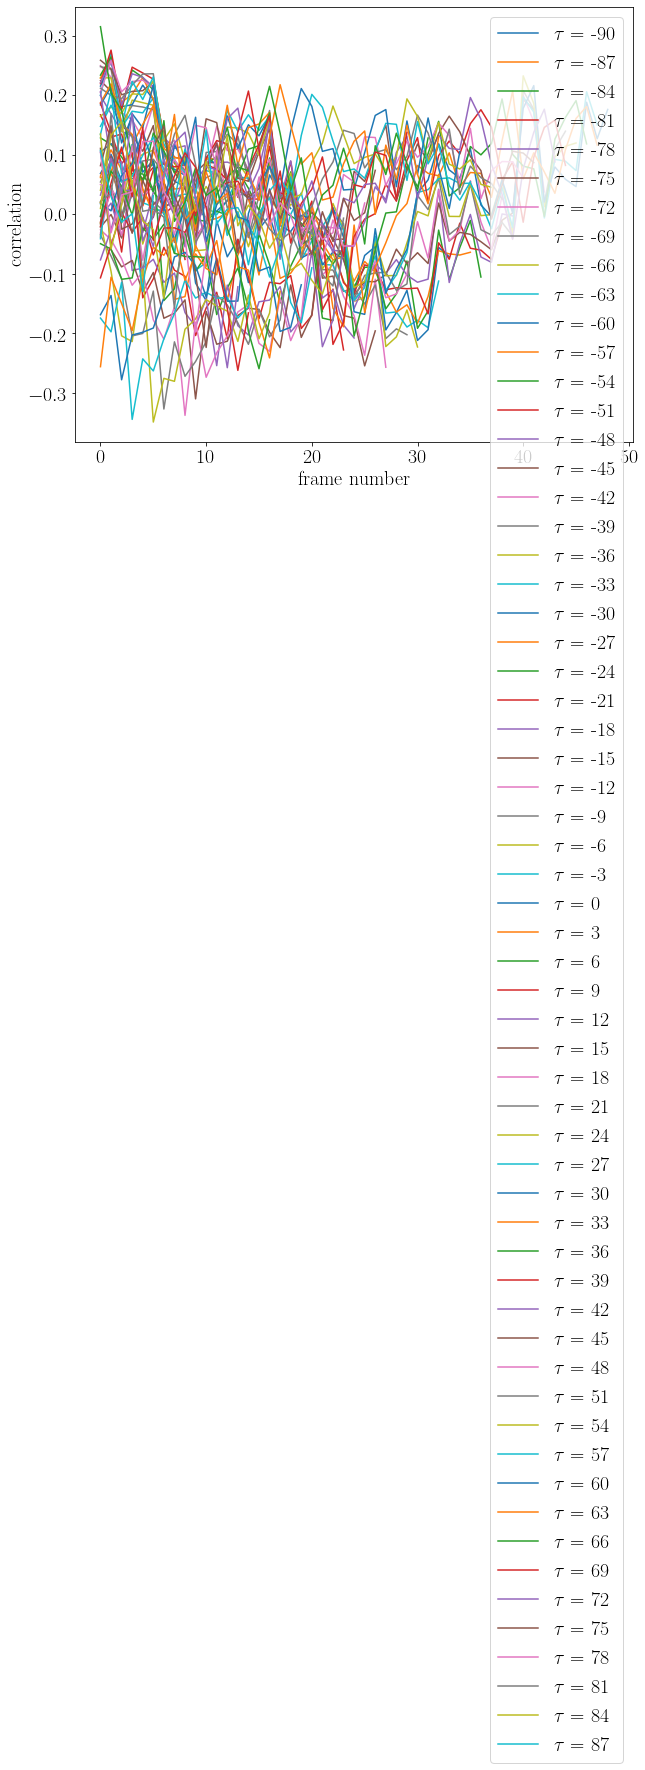

In [99]:
plt.figure(figsize=(10, 8))
for tau, CL in zip(tauL, CLL):
    plt.plot(CL, label=('$\\tau=$ ' + str(tau)))
plt.legend()
plt.xlabel('frame number')
plt.ylabel('correlation')

Text(0, 0.5, '$\\langle I(t)\\nabla\\cdot v(t+\\tau)\\rangle$')

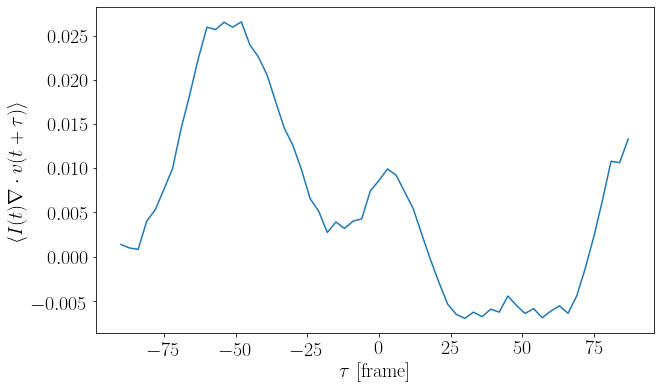

In [150]:
Cavg = []
for CL in CLL:
    Cavg.append(np.array(CL).mean())
plt.plot(tauL, Cavg)
plt.xlabel('$\\tau$ [frame]')
plt.ylabel(r'$\langle I(t)\nabla\cdot v(t+\tau)\rangle$')

Text(0, 0.5, '$\\langle I(t)\\nabla\\cdot v(t+\\tau)\\rangle$')

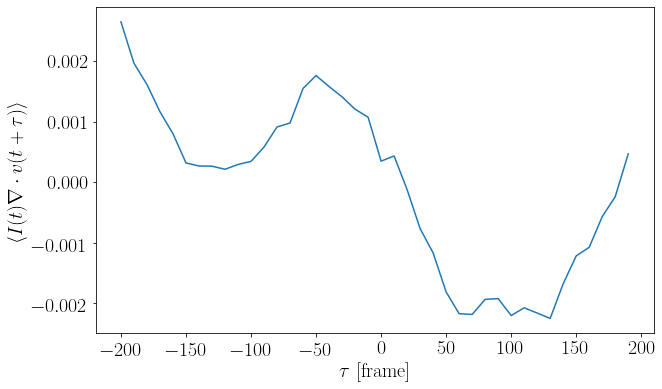

In [96]:
# Plot autocorrelation from saved data
folder_ixdiv = r'E:\moreData\02042020\i_div_autocorr\20-3'
sfL = next(os.walk(folder_ixdiv))[1]

t = []
autocorr = []
for sf in sfL:
    t.append(int(sf.split('=')[1]))
    data = pd.read_csv(os.path.join(folder_ixdiv, sf, 'data.csv'))
    autocorr.append(data.autocorr.mean())
data_sort = pd.DataFrame().assign(tau=t, ac=autocorr)
data_sort.sort_values(by=['tau'], inplace=True)
plt.plot(data_sort.tau, data_sort.ac)
plt.xlabel('$\\tau$ [frame]')
plt.ylabel(r'$\langle I(t)\nabla\cdot v(t+\tau)\rangle$')

In [135]:
data.autocorr.mean()

0.029542770872825388

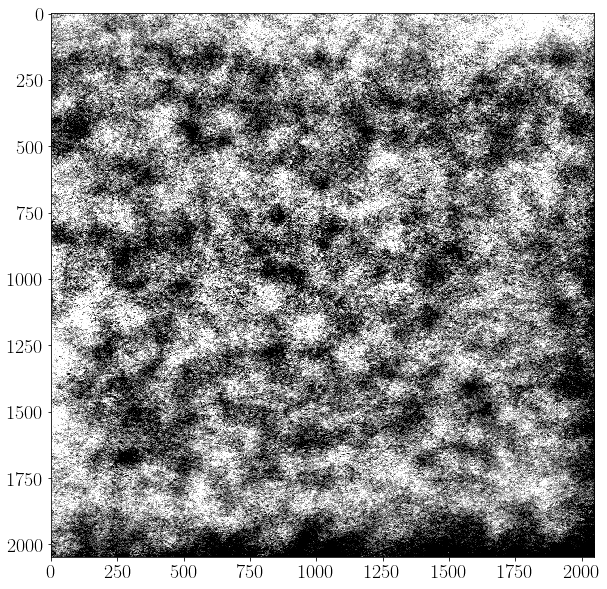

In [16]:
img = io.imread(r'E:\moreData\02042020\80-3\8-bit\0000.tif')
bp = mil.bpass(img, 3, 500)
bp_mh = cl.match_hist(bp, img)
plt.figure(figsize=(10,10))
plt.imshow(bp_mh, cmap='gray', vmin=141, vmax=167)

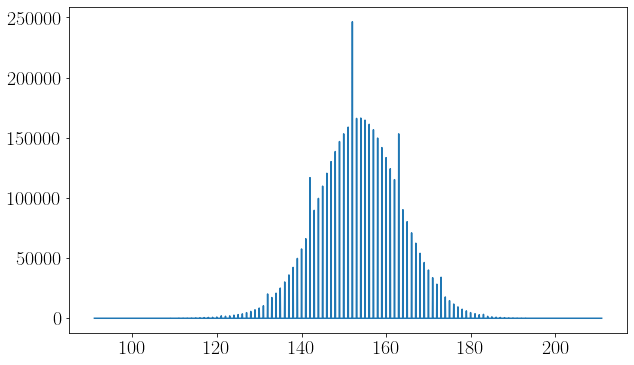

In [12]:
hist, bin_edges = np.histogram(bp_mh, bins='sqrt')
plt.plot(bin_edges[:-1], hist)

In [18]:
folder = r'E:\Github\Python\generic_proc\py_files'
os.path.split(folder)

('E:\\Github\\Python\\generic_proc', 'py_files')

In [22]:
name = '900'
tau = -200

In [23]:
img_name = str('{:04d}'.format(int(name) - tau))

In [24]:
img_name

'1100'